
  **Выявление профилей потребления для интернет-магазина товаров для дома и быта**  


**Цель:** Необходимо провести исследование, сегментировать покупателей по профилю потребления, по результатам подготовить рекомендации Заказчику для разработки более персонализированных (таргетированных) предложений для покупателей. 



**Основные этапы исследования:**

1. Загрузка и предобработка данных  

    - проверка наличия пропусков;
    - обработка дубликатов;
    - преобразование типов данных;
    - анализ наличия аномалий в данных (проверка на бизнес-правила "1 заказ - 1 клиент" и "1 заказ" - "1 дата").  
    

2. Исследовательский анализ данных

   - Распределение товаров по категориям;
   - Анализ динамики по количеству заказов, по количеству пользователей, расчет среднего чека и т.д.
   
   
3. Сегментация пользователей
      
 - по количеству заказов  
 - по категориям товаров
 - по среднему чеку  
 
 
4. Проверка статистических гипотез  
    
    - Проверка гипотезы об отсутствии отличий между долями клиентов, которые совершают только одну покупку, и более одной покупки.
    - Проверка гипотезы об отсутствии отличий ежемесячной выручки в декабре и ноябре.
    

5. Презентация

     
6. Выводы
   



### Загрузка и предобработка данных

#### Импорт библиотек и настройка опций

In [1]:

#---------------------------
# загрузка библиотек

import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from matplotlib import pyplot as plt


import os
#import pandas as pd
#import matplotlib.pyplot as plt
import scipy.stats as st
#import numpy as np
import seaborn as sns

pd.set_option('display.max_columns', 50)
sns.color_palette("pastel")

pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', 150)
pd.set_option('display.max_rows', None)

import warnings
warnings.filterwarnings("ignore")   

import plotly.express as px

None


#### Вспомогательные функции

In [2]:

#--------- функция загрузки датафрейма

def load_df(pth1, pth2):
    global df
    if os.path.exists(pth1):
        df = pd.read_csv(pth1, sep=",")
        print()
        print('Файл загружен: ', pth1)  
        print()
    elif os.path.exists(pth2):
        df = pd.read_csv(pth2, sep=",")
        print()
        print('Файл загружен: ', pth2)        
        print()
    else:
        print('Ошибка при загрузке датафрейма, проверьте путь расположения файла.')
    return df


In [3]:

#--------- функция проверки пропусков в датафрейме

def check_df(df, df_name, percent_info=False):
    
    df.attrs['name'] = df_name 
    
    
    #---------------------------
    # Проверяем наличие пропусков в датафрейме
    
    print('----------------------')
    print('Проверка пропусков в датафрейме <', df.attrs['name'], '>: ')
    print(df.isna().sum())
    print()
    
    #---------------------------
    # Подсчитываем процент пропусков в каждом столбце
    
    if percent_info==True:
        print('Процент пропущенных данных по каждому столбцу:')
        print()
        print(df.isna().sum() / df.isna().count()*100) 
        print()
    print('----------------------')
    
    return 


#### Загрузка файла с данными

In [4]:

#---------------------------
# определяем основной и альтернативный пути к расположению датасета

path_1 = 'C:/Users/user/Downloads/ecom_dataset_upd.csv'
path_1_alter = '/datasets/ecom_dataset_upd.csv'


#---------------------------
# загрузка файла c данными 

df = load_df(path_1, path_1_alter)



Файл загружен:  C:/Users/user/Downloads/ecom_dataset_upd.csv




#### Анализ датасета: загрузка общей информации, предварительный просмотр данных
    

In [5]:

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7474 entries, 0 to 7473
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         7474 non-null   int64  
 1   customer_id  7474 non-null   object 
 2   order_id     7474 non-null   int64  
 3   product      7474 non-null   object 
 4   quantity     7474 non-null   int64  
 5   price        7474 non-null   float64
dtypes: float64(1), int64(3), object(2)
memory usage: 350.5+ KB


In [6]:

df.head(25)


,date,customer_id,order_id,product,quantity,price
0,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Алое Вера, d12, h30",1,142.0
1,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Кофе Арабика, d12, h25",1,194.0
2,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Радермахера d-12 см h-20 см,1,112.0
3,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Хризолидокарпус Лутесценс d-9 см,1,179.0
4,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Циперус Зумула d-12 см h-25 см,1,112.0
5,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Шеффлера Лузеана d-9 см,1,164.0
6,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Юкка нитчатая d-12 см h-25-35 см,1,134.0
7,2018100108,375e0724-f033-4c76-b579-84969cf38ee2,68479,Настенная сушилка для белья Gimi Brio Super 100,1,824.0
8,2018100108,6644e5b4-9934-4863-9778-aaa125207701,68478,"Таз пластмассовый 21,0 л круглый ""Водолей"" С614, 1404056",1,269.0
9,2018100109,c971fb21-d54c-4134-938f-16b62ee86d3b,68480,Чехол для гладильной доски Colombo Persia Beige 130х50 см из хлопка 5379,1,674.0


In [7]:

df.tail(25)


,date,customer_id,order_id,product,quantity,price
7449,2020012713,d3e39f6c-9d17-49ee-aa32-3e78cbeb6404,106214,"Орехоколка VIVA, Attribute, ATV600",1,239.0
7450,2020012714,ae036d1b-b1d5-41e4-8c85-d2bd1b0b4e18,101880,Настурция Орхидное пламя 5 шт 4650091480692,1,14.0
7451,2020012714,c23c92a7-c8d8-46b4-8511-8efdf90d6a55,105214,Муляж Вишня 3 см 10 шт полиуретан,2,74.0
7452,2020012722,aae3b3d2-8ab8-4558-a141-e23f0b77e63d,106325,Сушилка для белья напольная COLOMBO ALPINA 30MT ST194/3CF,1,1574.0
7453,2020012722,43ff529f-8ff0-473d-8168-4b730137a2e1,111991,Цветок искусственный Василек 3 цветка 55 см пластик,1,42.0
7454,2020012811,ea0d1348-249e-4aff-9149-599eb6d98dec,106547,Настурция Орхидное пламя 5 шт 4650091480692,1,14.0
7455,2020012811,eeba9850-8d4b-40a7-a110-6d11a9196ddc,103325,Кружка для чая Сердечки 250 мл ДСГ55029146,1,45.0
7456,2020012814,57c8999f-ebad-485c-985e-9dc99837775d,112325,Рассада Капусты белокачанная сорт Сибирячка кассета 6 шт E6,2,120.0
7457,2020012815,92b18c53-a3d3-44cf-9492-a3566017d611,106880,Форма для выпечки ALPENKOK AK-6038S для кекса Спираль розовый d=25 см; h=9 см,1,254.0
7458,2020012815,04d4b824-7b31-4262-8aa0-e43772602521,110214,Тарелка обеденная КОТОН ФЛАУЭР 25 см H2776 Luminarc,1,90.0


In [8]:

check_df(df,'ecom_dataset_upd')
    

----------------------
Проверка пропусков в датафрейме < ecom_dataset_upd >: 
date           0
customer_id    0
order_id       0
product        0
quantity       0
price          0
dtype: int64

----------------------


**Выводы**  

**Предварительный анализ датафрейма показывает:**  


- всего строк: 7474;  


- пропуски в столбцах отсутствуют;


- преобразование названий столбцов к нижнему регистру и «snake_case» не требуется.  


- необходимо скорректировать тип столбца `date` на *datetime*.



#### Проверка явных дубликатов в датафрейме  

In [9]:

df.duplicated().sum()


0

Явные дубликаты отсутствуют.

#### Проверка наличия в датафрейме неявных дубликатов

Проанализируем столбец **`customer_id`**.

In [10]:

print(len(df['customer_id'].unique()))
df['customer_id'].unique()


2451


array(['ee47d746-6d2f-4d3c-9622-c31412542920',
       '375e0724-f033-4c76-b579-84969cf38ee2',
       '6644e5b4-9934-4863-9778-aaa125207701', ...,
       'f17ed857-178e-45e1-a662-0a9dd3b58c5f',
       '1f0a7f35-7459-4f23-b468-5e45bf481dd1',
       '25df96a7-c453-4708-9cea-a3dfc7c342ea'], dtype=object)

In [11]:

#-----преобразуем к верхнему регистру

df['customer_id'] = df['customer_id'].str.upper()
print(len(df['customer_id'].unique()))
df['customer_id'].unique()


2451


array(['EE47D746-6D2F-4D3C-9622-C31412542920',
       '375E0724-F033-4C76-B579-84969CF38EE2',
       '6644E5B4-9934-4863-9778-AAA125207701', ...,
       'F17ED857-178E-45E1-A662-0A9DD3B58C5F',
       '1F0A7F35-7459-4F23-B468-5E45BF481DD1',
       '25DF96A7-C453-4708-9CEA-A3DFC7C342EA'], dtype=object)

После преобразования к верхнему регистру количество уникальных значений `customer_id` не изменилось - 2451. Неявные дубликаты по полю `customer_id` отсутствуют.

Проанализируем столбец **`product`**.

In [12]:

df_src = pd.Series(df['product'])
print(len(df['product'].unique()))
df['product'].unique()


2343


array(['Комнатное растение в горшке Алое Вера, d12, h30',
       'Комнатное растение в горшке Кофе Арабика, d12, h25',
       'Радермахера d-12 см h-20 см', ...,
       'Сушилка для белья на ванну FREUDENBERG (GIMI) Alablock Varadero silver A4P',
       'Каланхое каландива малиновое d-7 см', 'Литопс Микс d-5 см'],
      dtype=object)

На начальном этапе количество уникальных значений  - 2343.   
Сформируем сводную таблицу для оценки количества уникальных наименований товаров: 

In [13]:

df_src_product = df.pivot_table(index='product', values='quantity', \
                                aggfunc='sum').sort_values(by='quantity', ascending=False).reset_index()

print(len(df_src_product))
df_src_product.head(5)


2343


,product,quantity
0,"Вантуз с деревянной ручкой d14 см красный, Burstenmann, 0522/0000",1000
1,Муляж ЯБЛОКО 9 см красное,618
2,Вешалки мягкие для деликатных вещей 3 шт шоколад,335
3,"Крепеж для пружины дверной, 1107055",320
4,Муляж Яблоко зеленый 9 см полиуретан,308


Преобразуем наименования к верхнему регистру:


In [14]:

df_src_product['product'] = df_src_product['product'].str.upper()

print(len(df_src_product))
df_src_product.head(5)


2343


,product,quantity
0,"ВАНТУЗ С ДЕРЕВЯННОЙ РУЧКОЙ D14 СМ КРАСНЫЙ, BURSTENMANN, 0522/0000",1000
1,МУЛЯЖ ЯБЛОКО 9 СМ КРАСНОЕ,618
2,ВЕШАЛКИ МЯГКИЕ ДЛЯ ДЕЛИКАТНЫХ ВЕЩЕЙ 3 ШТ ШОКОЛАД,335
3,"КРЕПЕЖ ДЛЯ ПРУЖИНЫ ДВЕРНОЙ, 1107055",320
4,МУЛЯЖ ЯБЛОКО ЗЕЛЕНЫЙ 9 СМ ПОЛИУРЕТАН,308


Проверим наличие дубликатов в этом поле после преобразования:

In [15]:

df_src_product['product'].duplicated().sum()


2

In [16]:

duplicateRows = df_src_product[df_src_product.duplicated(['product'], keep=False)]
duplicateRows


,product,quantity
937,РОЗА КОРДАНА БЕЛАЯ D-10 СМ H-20,3
1126,РОЗА ПАТИО ОРАНЖЕВАЯ D-12 СМ H-30,2
2107,РОЗА КОРДАНА БЕЛАЯ D-10 СМ H-20,1
2117,РОЗА ПАТИО ОРАНЖЕВАЯ D-12 СМ H-30,1


По 2-м позициям товаров фиксируем дублирование идентичных наименований. Для корректного учета наименований при дальнейшем анализе данных преобразуем к верхнему регистру наименования в этом поле в исходном датафрейме:

In [17]:

#-----преобразуем к верхнему регистру

df['product'] = df['product'].str.upper()
print(len(df['product'].unique()))
df['product'].unique()

df_Upper_product = pd.Series(df['product'])


2341


После преобразования выполним повторную проверку наличия явных дубликатов:

In [18]:

df.duplicated().sum()


0


**Дубликаты отсутствуют.**


In [19]:

df.head(5)


,date,customer_id,order_id,product,quantity,price
0,2018100100,EE47D746-6D2F-4D3C-9622-C31412542920,68477,"КОМНАТНОЕ РАСТЕНИЕ В ГОРШКЕ АЛОЕ ВЕРА, D12, H30",1,142.0
1,2018100100,EE47D746-6D2F-4D3C-9622-C31412542920,68477,"КОМНАТНОЕ РАСТЕНИЕ В ГОРШКЕ КОФЕ АРАБИКА, D12, H25",1,194.0
2,2018100100,EE47D746-6D2F-4D3C-9622-C31412542920,68477,РАДЕРМАХЕРА D-12 СМ H-20 СМ,1,112.0
3,2018100100,EE47D746-6D2F-4D3C-9622-C31412542920,68477,ХРИЗОЛИДОКАРПУС ЛУТЕСЦЕНС D-9 СМ,1,179.0
4,2018100100,EE47D746-6D2F-4D3C-9622-C31412542920,68477,ЦИПЕРУС ЗУМУЛА D-12 СМ H-25 СМ,1,112.0


Оценим количество уникальных заказов в исходном датасете:

In [20]:

print(len(df['order_id'].unique()))


3521



#### Проверка бизнес-правила "1 заказ - 1 клиент"


Проверим датасет на наличие строк, когда одному номеру заказа соответствует несколько идентификаторов клиентов:

In [21]:

df_order_customer_check = df.groupby(['order_id']).agg({'customer_id' : 'nunique'}).reset_index()
df_order_customer_check.columns = ['order_id', 'customer_id_counter']

df_order_customer_check = \
        df_order_customer_check.query('customer_id_counter > 1').sort_values(by='customer_id_counter', ascending=False)

orders_delete_list = df_order_customer_check['order_id']

df_order_customer_check.info()
df_order_customer_check


<class 'pandas.core.frame.DataFrame'>
Int64Index: 29 entries, 2610 to 2677
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   order_id             29 non-null     int64
 1   customer_id_counter  29 non-null     int64
dtypes: int64(2)
memory usage: 696.0 bytes


,order_id,customer_id_counter
2610,72845,4
902,69485,3
1914,71480,3
248,14872,2
1651,70946,2
2576,72790,2
2569,72778,2
2269,72188,2
2004,71663,2
2000,71648,2


In [22]:

print('')
print('Всего строк в исходном датасете:', len(df))
print('Строк к удалению:', len(df) - len(df.query('order_id not in @orders_delete_list')))
print('% строк в удалению:', (len(df) - len(df.query('order_id not in @orders_delete_list')))/len(df)*100)
print('')



Всего строк в исходном датасете: 7474
Строк к удалению: 89
% строк в удалению: 1.1907947551511908



Присутствует 29 "проблемных" заказов, что соответствует 89 транзакциям в датасете и составляет порядка 1.2%.  
Чтобы исключить искажение результатов (смещение статистик) удалим такие заказы (все транзакции с этими заказами) из датасета.

In [23]:

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7474 entries, 0 to 7473
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         7474 non-null   int64  
 1   customer_id  7474 non-null   object 
 2   order_id     7474 non-null   int64  
 3   product      7474 non-null   object 
 4   quantity     7474 non-null   int64  
 5   price        7474 non-null   float64
dtypes: float64(1), int64(3), object(2)
memory usage: 350.5+ KB


In [24]:

df = df.query('order_id not in @orders_delete_list')
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 7385 entries, 0 to 7473
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         7385 non-null   int64  
 1   customer_id  7385 non-null   object 
 2   order_id     7385 non-null   int64  
 3   product      7385 non-null   object 
 4   quantity     7385 non-null   int64  
 5   price        7385 non-null   float64
dtypes: float64(1), int64(3), object(2)
memory usage: 403.9+ KB



#### Проверка бизнес-правила "1 заказ" - "1 дата"



Проверим датасет на наличие строк, когда одному номеру заказа соответствует несколько разных дат:


In [25]:

df_order_date_check = df.groupby(['order_id']).agg({'date' : 'nunique'}).reset_index()
df_order_date_check.columns = ['order_id', 'date_counter']

df_order_date_check = \
        df_order_date_check.query('date_counter > 1').sort_values(by='date_counter', ascending=False)
df_order_date_check.info()

orders_delete_list_2 = df_order_date_check['order_id']


<class 'pandas.core.frame.DataFrame'>
Int64Index: 256 entries, 221 to 2738
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   order_id      256 non-null    int64
 1   date_counter  256 non-null    int64
dtypes: int64(2)
memory usage: 6.0 KB


In [26]:

df_order_date_check.tail(5)


,order_id,date_counter
625,68971,2
1637,70949,2
1639,70953,2
589,68919,2
2738,73137,2


In [27]:

df_order_date_check.head(30)


,order_id,date_counter
221,14833,74
1642,70960,60
725,69162,23
1737,71148,16
1363,70419,10
924,69527,9
1888,71463,9
1644,70962,8
1,13547,7
1477,70620,7


Проверим выборочно несколько таких заказов:

In [28]:

df.groupby(['order_id', 'date', 'product']).agg({'quantity' : 'sum'}).query('order_id == 70115')


quantity
order_id date       product                                 
70115    2019020520 ИСКУССТВЕННАЯ ЛИАНА ПЛЮЩ 2,4 М         2
         2019020523 ИСКУССТВЕННАЯ ЛИАНА ПЛЮЩ 2,4 М         2
         2019020700 ИСКУССТВЕННАЯ ЛИАНА ПЛЮЩ 2,4 М         2
         2019020919 ИСКУССТВЕННАЯ ЛИАНА ПЛЮЩ 2,4 М         2
         2019021117 ИСКУССТВЕННАЯ ЛИАНА ПЛЮЩ 2,4 М         2

In [29]:

df.groupby(['order_id', 'date', 'product']).agg({'quantity' : 'sum'}).query('order_id == 73137 or order_id == 68971')


quantity
order_id date       product                                                            
68971    2018111214 ВЕШАЛКА НАПОЛЬНАЯ ATLANT 90Х42 СМ VATL-1 СВЕТЛАЯ СТЕПАНОВ         2
         2018111217 ВЕШАЛКА НАПОЛЬНАЯ ATLANT 90Х42 СМ VATL-1 СВЕТЛАЯ СТЕПАНОВ         2
73137    2019103009 СУМКА-ТЕЛЕЖКА 2-Х КОЛЕСНАЯ GIMI ARGO СИНЯЯ                        1
         2019103116 СУМКА-ТЕЛЕЖКА 2-Х КОЛЕСНАЯ GIMI ARGO СИНЯЯ                        1

In [30]:

print('')
print('Всего строк в исходном датасете:', len(df))
print('Строк к удалению:', len(df) - len(df.query('order_id not in @orders_delete_list_2')))
print('% строк в удалению:', (len(df) - len(df.query('order_id not in @orders_delete_list_2')))/len(df)*100)
print('')



Всего строк в исходном датасете: 7385
Строк к удалению: 2384
% строк в удалению: 32.28165199729181



Найдено 256 "проблемных" заказов, что соответствует 2384 транзакциям в датасете и составляет порядка 32.3%, почти 1/3 всех транзакций в датасете. Учитывая это, целесообразно проинформировать Заказчика о проблемах в предоставленной выгрузке с данными.  Чтобы исключить искажение результатов (смещение статистик) для дальнейшего исследования удалим такие заказы (все транзакции с этими заказами) из датасета.

In [31]:

df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 7385 entries, 0 to 7473
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         7385 non-null   int64  
 1   customer_id  7385 non-null   object 
 2   order_id     7385 non-null   int64  
 3   product      7385 non-null   object 
 4   quantity     7385 non-null   int64  
 5   price        7385 non-null   float64
dtypes: float64(1), int64(3), object(2)
memory usage: 403.9+ KB


In [32]:

df = df.query('order_id not in @orders_delete_list_2')
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 5001 entries, 0 to 7473
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         5001 non-null   int64  
 1   customer_id  5001 non-null   object 
 2   order_id     5001 non-null   int64  
 3   product      5001 non-null   object 
 4   quantity     5001 non-null   int64  
 5   price        5001 non-null   float64
dtypes: float64(1), int64(3), object(2)
memory usage: 273.5+ KB



Осталось уникальных заказов в датасете:


In [33]:

print(len(df['order_id'].unique()))


3236


#### Преобразование типов полей и добавление дополнительных полей

Преобразуем тип столбца `date` к *datetime*:

In [34]:

df['date'] = pd.to_datetime(df['date'], format='%Y%m%d%H')


Добавим дополнительные поля ('месяц', 'номер недели', 'день недели', час и т.д.) для последующего анализа:

In [35]:

df['year']  = df['date'].dt.year
df['week'] = df['date'].dt.week
df['month']  = df['date'].dt.month
df['month_name']  = df['date'].dt.month_name()
df['day'] = df['date'].dt.day
df['week_day'] = df['date'].dt.dayofweek
df['week_day_name'] = df['date'].dt.day_name()
df['hour']  = df['date'].dt.hour


Выборочно проверим наборы уникальных значений:

In [36]:

df['month'].unique()


array([10, 11, 12,  1,  2,  3,  4,  5,  6,  7,  8,  9], dtype=int64)

In [37]:

df['day'].unique()


array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31],
      dtype=int64)

In [38]:

df['week_day'].unique()


array([0, 1, 2, 3, 4, 5, 6], dtype=int64)

In [39]:

df['hour'].unique() 


array([ 0,  8,  9, 11, 12, 13, 15, 16, 10, 14, 17, 18, 21, 20,  7, 19,  3,
        5, 22, 23,  1,  2,  6,  4], dtype=int64)

Добавим дополнительное поле `total_price` (общая стоимость заказанной позиции товара: цена 1 ед. товара **х** количество товара)':

In [40]:

df['total_price'] = df['price'] * df['quantity'] 
df['total_price'].describe()


count      5001.000000
mean        854.635156
std        9687.472861
min           9.000000
25%         120.000000
50%         194.000000
75%         734.000000
max      675000.000000
Name: total_price, dtype: float64

In [41]:

df.head(3)


,date,customer_id,order_id,product,quantity,price,year,week,month,month_name,day,week_day,week_day_name,hour,total_price
0,2018-10-01,EE47D746-6D2F-4D3C-9622-C31412542920,68477,"КОМНАТНОЕ РАСТЕНИЕ В ГОРШКЕ АЛОЕ ВЕРА, D12, H30",1,142.0,2018,40,10,October,1,0,Monday,0,142.0
1,2018-10-01,EE47D746-6D2F-4D3C-9622-C31412542920,68477,"КОМНАТНОЕ РАСТЕНИЕ В ГОРШКЕ КОФЕ АРАБИКА, D12, H25",1,194.0,2018,40,10,October,1,0,Monday,0,194.0
2,2018-10-01,EE47D746-6D2F-4D3C-9622-C31412542920,68477,РАДЕРМАХЕРА D-12 СМ H-20 СМ,1,112.0,2018,40,10,October,1,0,Monday,0,112.0


In [42]:

df.tail(3)


,date,customer_id,order_id,product,quantity,price,year,week,month,month_name,day,week_day,week_day_name,hour,total_price
7471,2020-01-31 02:00:00,2C9BD08D-8C55-4E7A-9BFB-8C56BA42C6D6,106336,ПОДСТАВКА ДЛЯ ОБУВИ РЕЗИНОВАЯ ATTRIBUTE 80X40 СМ AMC080,1,354.0,2020,5,1,January,31,4,Friday,2,354.0
7472,2020-01-31 12:00:00,CDD17932-623E-415F-A577-3B31312FD0E2,102002,ТАГЕТИС КРУПНОЦВЕТКОВЫЙ РАССАДА ОДНОЛЕТНИХ ЦВЕТОВ В КАССЕТЕ ПО 6 ШТ,1,128.0,2020,5,1,January,31,4,Friday,12,128.0
7473,2020-01-31 15:00:00,2E460A26-35AF-453D-A369-A036E95A40E0,103225,ВЕШАЛКА ДЛЯ БЛУЗОК 41 СМ КРАСНЫЙ ATTRIBUTE AHM781,1,104.0,2020,5,1,January,31,4,Friday,15,104.0


#### Проверка выбросов

Проверим наличие выбросов в поле `количество` и `стоимость` товара в транзакции.

In [43]:

df[['quantity','total_price']].describe()


,quantity,total_price
count,5001.000000,5001.000000
mean,2.558688,854.635156
std,17.031835,9687.472861
min,1.000000,9.000000
25%,1.000000,120.000000
50%,1.000000,194.000000
75%,1.000000,734.000000
max,1000.000000,675000.000000


Минимальное значение  - 1, максимальное - 1000 для `quantity`, и соответственно, 9 и 675000 для `total_price`.
Построим "ящики с усами"...

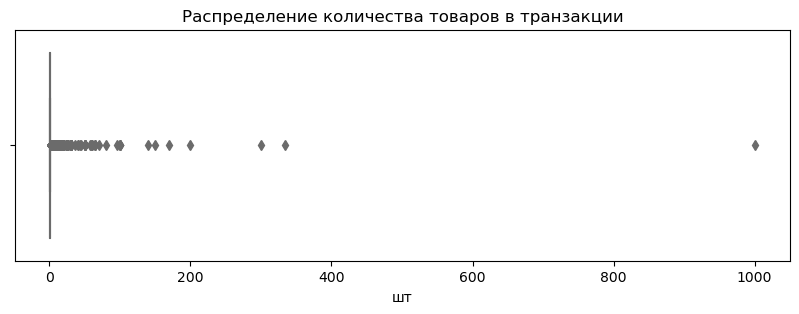

In [44]:

fig = plt.subplots(figsize=(10,3))

plt.title("Распределение количества товаров в транзакции", fontsize=12)
plot = sns.boxplot(x='quantity', data=df, color=".7")

plt.xlabel('шт', fontsize=10)
None


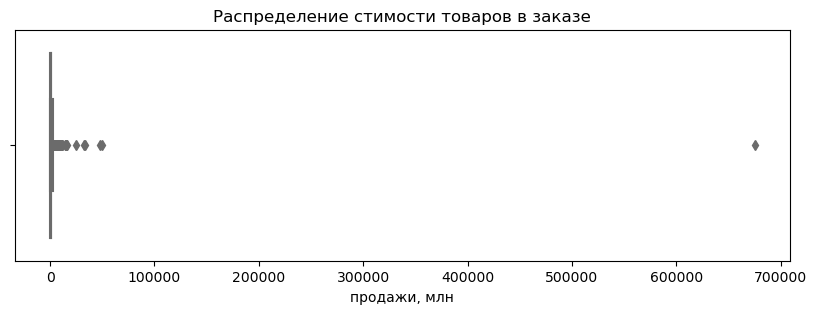

In [45]:

fig = plt.subplots(figsize=(10,3))

plt.title("Распределение стимости товаров в заказе", fontsize=12)

plot = sns.boxplot(x='total_price',
    data=df.pivot_table(index=['order_id'], values='total_price', aggfunc='sum').reset_index(),\
                  color=".7")

plt.xlabel('продажи, млн', fontsize=10)
None


In [46]:

df_q = df[['date','order_id','product','price','quantity','total_price']].sort_values('quantity', ascending=False)
df_q.head(10)


,date,order_id,product,price,quantity,total_price
5456,2019-06-18 15:00:00,71743,"ВАНТУЗ С ДЕРЕВЯННОЙ РУЧКОЙ D14 СМ КРАСНЫЙ, BURSTENMANN, 0522/0000",675.0,1000,675000.0
5071,2019-06-11 07:00:00,71668,ВЕШАЛКИ МЯГКИЕ ДЛЯ ДЕЛИКАТНЫХ ВЕЩЕЙ 3 ШТ ШОКОЛАД,148.0,334,49432.0
3961,2019-05-20 21:00:00,71478,МУЛЯЖ ЯБЛОКО 9 СМ КРАСНОЕ,51.0,300,15300.0
1158,2018-12-10 14:00:00,69289,"РУЧКА-СКОБА РС-100 БЕЛАЯ *ТРИБАТРОН*, 1108035",29.0,200,5800.0
568,2018-11-01 08:00:00,68815,МУЛЯЖ ЯБЛОКО 9 СМ КРАСНОЕ,51.0,170,8670.0
2431,2019-03-23 10:00:00,70841,ПЛЕЧИКИ ПЛАСТМАССОВЫЕ РАЗМЕР 52 - 54 ТУЛА 1205158,20.0,150,3000.0
586,2018-11-02 11:00:00,68831,МУЛЯЖ ЯБЛОКО 9 СМ КРАСНОЕ,59.0,140,8260.0
1103,2018-12-04 17:00:00,69206,"ЩЕТКА ДЛЯ ПОСУДЫ *ОЛЯ*, МУЛЬТИПЛАСТ 1807010",26.0,100,2600.0
6535,2019-10-07 11:00:00,72885,"КРЕПЕЖ ДЛЯ ПРУЖИНЫ ДВЕРНОЙ ОЦИНКОВАННЫЙ, 1107054",19.0,100,1900.0
1555,2019-01-21 09:00:00,69893,ЩЕТКА ДЛЯ МЫТЬЯ ПОСУДЫ КОЛИБРИ М5202 БОЛЬШАЯ,34.0,100,3400.0


Высокие значения для количества товара вполне могут соответствовать большим оптовым закупкам, поэтому удалять значения из датасета не будем.

#### Категории товаров

Оценим количество уникальных товаров, представленных в ассортименте магазина:

In [47]:

print(len(df['product'].unique()))


2196


Учитывая, что разбивка товаров на категории с применением алгоритмов лемматизации и прочих алгоритмов требует значительных трудозатрат и выходит за рамки реализации учебного проекта, применим более простой подход к разбивке товаров на категории.

Добавим в датасет новое вспомогательное поле-подстроку, которое сформируем как первое слово из наименования позиции товара в столбце product):

In [48]:

df['product_sstr'] = df['product'].str.split(' ').str[0]


In [49]:

print(len(df['product_sstr'].unique()))


435


При этом получаем 435 уникальных значений в этом поле. Для рейтингования позиций товаров сформируем сводную таблицу и рассмотрим эти значения:

In [50]:

df_keyword = df.pivot_table(index=['product_sstr'], values='order_id', aggfunc='count').sort_values('order_id', ascending=False)
df_keyword


,order_id
product_sstr,
ПЕЛАРГОНИЯ,681
РАССАДА,452
СУШИЛКА,281
СУМКА-ТЕЛЕЖКА,242
МУЛЯЖ,159
ТОМАТА,152
ПЕТУНИЯ,147
ГЛАДИЛЬНАЯ,126
КОВРИК,118


А также при формирования словаря для категорий товаров будем учитывать рейтинг по количеству товара.

In [51]:

df_q = df.groupby('product').agg({'quantity' : 'sum'}).sort_values(by='quantity', ascending=False)
df_q.head(200)


,quantity
product,
"ВАНТУЗ С ДЕРЕВЯННОЙ РУЧКОЙ D14 СМ КРАСНЫЙ, BURSTENMANN, 0522/0000",1000
МУЛЯЖ ЯБЛОКО 9 СМ КРАСНОЕ,618
ВЕШАЛКИ МЯГКИЕ ДЛЯ ДЕЛИКАТНЫХ ВЕЩЕЙ 3 ШТ ШОКОЛАД,335
"РУЧКА-СКОБА РС-100 БЕЛАЯ *ТРИБАТРОН*, 1108035",201
ПЛЕЧИКИ ПЛАСТМАССОВЫЕ РАЗМЕР 52 - 54 ТУЛА 1205158,160
МУЛЯЖ ЯБЛОКО ЗЕЛЕНЫЙ 9 СМ ПОЛИУРЕТАН,148
МУЛЯЖ БАНАН ЖЕЛТЫЙ 21 СМ ПОЛИУРЕТАН,108
"ЩЕТКА-СМЕТКА 4-Х РЯДНАЯ ДЕРЕВЯННАЯ 300 ММ (ФИГУРНАЯ РУЧКА) ВОРС 5,5 СМ 1801096",105
"ЩЕТКА ДЛЯ ПОСУДЫ *ОЛЯ*, МУЛЬТИПЛАСТ 1807010",101


С учетом представленных значений определим функцию для разбивке товаров на опредленные категории, внутри функции сформируем вспомогательный словарь.    

Разделим товары условно на следущие категории:   

  - ТОВАРЫ ДЛЯ ВАННОЙ
  - ЦВЕТЫ
  - ИСКУССТВЕННЫЕ ЦВЕТЫ
  - ТОВАРЫ ДЛЯ ДАЧИ
  - ТОВАРЫ ДЛЯ ДОМА
  - ПОСУДА
  - ХОЗТОВАРЫ
  - НАБОРЫ
  - РАЗНОЕ
  
  

In [52]:

def create_category(_df_):
    
    dict={' ВАНН' : 'ТОВАРЫ ДЛЯ ВАННОЙ', 
          'СУШИЛКА' : 'ТОВАРЫ ДЛЯ ВАННОЙ', 
          'МЫЛ' : 'ТОВАРЫ ДЛЯ ВАННОЙ',
          'ВАНТУ' : 'ТОВАРЫ ДЛЯ ВАННОЙ',
          
          'ЦВЕТОК' : 'ЦВЕТЫ',
          'РОЗА' : 'ЦВЕТЫ',
          'ПЕЛАРГОНИЯ' : 'ЦВЕТЫ',
          'ПЕТУНИЯ' : 'ЦВЕТЫ',
          'ГЕРАНЬ' : 'ЦВЕТЫ',
          'ЦИПЕРУС' : 'ЦВЕТЫ',
          'ДЕКАБРИСТ' : 'ЦВЕТЫ',
          'БАЛЬЗАМИН' : 'ЦВЕТЫ',
          'АНТУРИУМ' : 'ЦВЕТЫ',
          'ПУАНСЕТТИЯ' : 'ЦВЕТЫ',
          'ЦИКЛАМЕН' : 'ЦВЕТЫ',
          'АФЕЛЯНДРА' : 'ЦВЕТЫ',
          'ХЛОРОФИТУМ' : 'ЦВЕТЫ',
          'НЕЗАБУДК' : 'ЦВЕТЫ',
          'ГОРШ' : 'ЦВЕТЫ',
          'РАСТЕН' : 'ЦВЕТЫ',
          'КАШПО' : 'ЦВЕТЫ',
          'D-5 СМ' : 'ЦВЕТЫ',
          'D-7 СМ' : 'ЦВЕТЫ',
          'D-8 СМ' : 'ЦВЕТЫ',
          'D-9 СМ' : 'ЦВЕТЫ',
          'D-10 СМ' : 'ЦВЕТЫ',
          'D-11 СМ' : 'ЦВЕТЫ',
          'D-12 СМ' : 'ЦВЕТЫ',
          'D-13 СМ' : 'ЦВЕТЫ',
          'D-15 СМ' : 'ЦВЕТЫ',
          'D-16 СМ' : 'ЦВЕТЫ',
          'D-17 СМ' : 'ЦВЕТЫ',
          'D-18 СМ' : 'ЦВЕТЫ',
          'D-19 СМ' : 'ЦВЕТЫ',               
          'D-20 СМ' : 'ЦВЕТЫ',         
          'D-21 СМ' : 'ЦВЕТЫ',                    
          'ОБЪЕМ ' : 'ЦВЕТЫ',
          'МИРТ' : 'ЦВЕТЫ',
          ' Г ' : 'ЦВЕТЫ',
          
          'ИСКУССТВЕННЫЙ ЦВЕТОК' : 'ИСКУССТВЕННЫЕ ЦВЕТЫ',
          
          'РАССАДА' : 'ТОВАРЫ ДЛЯ ДАЧИ',
          'ТОМАТ' : 'ТОВАРЫ ДЛЯ ДАЧИ',
          'ОДНОЛЕТНЕЕ' : 'ТОВАРЫ ДЛЯ ДАЧИ',
          'БАКОПА' : 'ТОВАРЫ ДЛЯ ДАЧИ',
          'ПЕРЧАТКИ' : 'ТОВАРЫ ДЛЯ ДАЧИ',
          'БАЗИЛИК' : 'ТОВАРЫ ДЛЯ ДАЧИ',
          'КАПУСТА' : 'ТОВАРЫ ДЛЯ ДАЧИ',
          'КАЛИБРАХОА' : 'ТОВАРЫ ДЛЯ ДАЧИ',
          'БЕГОНИЯ' : 'ТОВАРЫ ДЛЯ ДАЧИ',
          'ФУКСИЯ' : 'ТОВАРЫ ДЛЯ ДАЧИ',
          'ПРИМУЛА' : 'ТОВАРЫ ДЛЯ ДАЧИ',
          'МЯТА' : 'ТОВАРЫ ДЛЯ ДАЧИ',
          'ФЛОКС' : 'ТОВАРЫ ДЛЯ ДАЧИ',
          'ФИАЛКА' : 'ТОВАРЫ ДЛЯ ДАЧИ',
          'ТИМЬЯН' : 'ТОВАРЫ ДЛЯ ДАЧИ',
          'ЛОБЕЛИЯ' : 'ТОВАРЫ ДЛЯ ДАЧИ',
          'ЭВКАЛИПТ' : 'ТОВАРЫ ДЛЯ ДАЧИ',
          'ДЫНЯ' : 'ТОВАРЫ ДЛЯ ДАЧИ',
          'ВИОЛА' : 'ТОВАРЫ ДЛЯ ДАЧИ',
          'ГАЗАНИЯ' : 'ТОВАРЫ ДЛЯ ДАЧИ',
          'ХРИЗАНТЕМА' : 'ТОВАРЫ ДЛЯ ДАЧИ',
          'НАСТУРЦИЯ' : 'ТОВАРЫ ДЛЯ ДАЧИ',
          'ГВОЗДИКА' : 'ТОВАРЫ ДЛЯ ДАЧИ',
          'ВЕРБЕНА' : 'ТОВАРЫ ДЛЯ ДАЧИ',
          'ПЕТРУШКА' : 'ТОВАРЫ ДЛЯ ДАЧИ',
          'КАЛАТЕЯ' : 'ТОВАРЫ ДЛЯ ДАЧИ',
          'КОЛОКОЛЬЧИК' : 'ТОВАРЫ ДЛЯ ДАЧИ',
          'КОСМЕЯ' : 'ТОВАРЫ ДЛЯ ДАЧИ',
          'ПОДРУКАВНИК' : 'ТОВАРЫ ДЛЯ ДАЧИ',
          'ЧЕРЕНОК' : 'ТОВАРЫ ДЛЯ ДАЧИ',
          'АРБУЗ' : 'ТОВАРЫ ДЛЯ ДАЧИ',
          'КАССЕТ' : 'ТОВАРЫ ДЛЯ ДАЧИ',
          'ОГУРЕЦ' : 'ТОВАРЫ ДЛЯ ДАЧИ',
          'ОСИНА' : 'ТОВАРЫ ДЛЯ ДАЧИ',
          'ПАПОРОТНИК' : 'ТОВАРЫ ДЛЯ ДАЧИ',
          'УКРОП' : 'ТОВАРЫ ДЛЯ ДАЧИ',
          'УРНА' : 'ТОВАРЫ ДЛЯ ДАЧИ',
          
                              
          'МУЛЯЖ' : 'ТОВАРЫ ДЛЯ ДОМА', 
          'ШТОР' : 'ТОВАРЫ ДЛЯ ДОМА', 
          'СКАТЕРТ' : 'ТОВАРЫ ДЛЯ ДОМА', 
          'ПОЛК' : 'ТОВАРЫ ДЛЯ ДОМА',
          'ДЕКОРАТИВ' : 'ТОВАРЫ ДЛЯ ДОМА',          
          'ДЕРЕВ' : 'ТОВАРЫ ДЛЯ ДОМА',
          'МАХР' : 'ТОВАРЫ ДЛЯ ДОМА',
          'ПЛЕД' : 'ТОВАРЫ ДЛЯ ДОМА',
          'ПОКРЫВ' : 'ТОВАРЫ ДЛЯ ДОМА',
          'ПОДУШ' : 'ТОВАРЫ ДЛЯ ДОМА',
          'ПОЛОТЕНЦ' : 'ТОВАРЫ ДЛЯ ДОМА',
          'ПРОСТЫН' : 'ТОВАРЫ ДЛЯ ДОМА',
          'НАМАТРА' : 'ТОВАРЫ ДЛЯ ДОМА',
          'НАВОЛОЧ' : 'ТОВАРЫ ДЛЯ ДОМА',
          
                    
          'ТАРЕЛК' : 'ПОСУДА',
          'САЛАТНИК' : 'ПОСУДА',
          'ЧАЙНИК' : 'ПОСУДА',
          'НОЖ' : 'ПОСУДА',
          'КАСТРЮЛЯ' : 'ПОСУДА',
          'ХЛЕБНИЦА' : 'ПОСУДА',
          'ТЕРМОКРУЖКА' : 'ПОСУДА',
          'СКОВОРОДА' : 'ПОСУДА',
          'КУВШИН' : 'ПОСУДА',
          'ВИЛКА' : 'ПОСУДА',
          'ЛОЖКА' : 'ПОСУДА',
          'КРУЖКА' : 'ПОСУДА',
          'БЛЮД' : 'ПОСУДА',
          'МИСК' : 'ПОСУДА',
          'СТАКАН' : 'ПОСУДА',
          'ТЕРМОС' : 'ПОСУДА',
                    
                    
          'СУМКА' : 'ХОЗТОВАРЫ',            
          'ТЕЛЕЖК' : 'ХОЗТОВАРЫ',            
          'ГЛАДИЛЬН' : 'ХОЗТОВАРЫ',
          'КОВРИК' : 'ХОЗТОВАРЫ',
          'ЧЕХОЛ' : 'ХОЗТОВАРЫ',
          'ТЕЛЕЖК' : 'ХОЗТОВАРЫ',          
          'ТАЗ' : 'ХОЗТОВАРЫ',
          'КОРЗИН' : 'ХОЗТОВАРЫ',
          'КОНТЕЙНЕР' : 'ХОЗТОВАРЫ',
          'ЛЕСТНИЦ' : 'ХОЗТОВАРЫ',
          'СТРЕМЯНК' : 'ХОЗТОВАРЫ',
          'ШВАБРА' : 'ХОЗТОВАРЫ',
          'ЩЕТК' : 'ХОЗТОВАРЫ',
          'ВЕШАЛК' : 'ХОЗТОВАРЫ',
          'ПЛЕЧИКИ' : 'ХОЗТОВАРЫ',
          'КАРНИЗ' : 'ХОЗТОВАРЫ',
          'ВЕДР' : 'ХОЗТОВАРЫ',
          'ВЕСЫ' : 'ХОЗТОВАРЫ',
          'ЯЩИК' : 'ХОЗТОВАРЫ',
          'КРЮЧОК' : 'ХОЗТОВАРЫ',
          'БАНКА' : 'ХОЗТОВАРЫ',
          'ЁРШ' : 'ХОЗТОВАРЫ',
          'САЛФЕТ' : 'ХОЗТОВАРЫ',
          'ПОДСТАВК' : 'ХОЗТОВАРЫ',
          'ОКНОМОЙКА' : 'ХОЗТОВАРЫ',
          'СИДЕНЬЕ' : 'ХОЗТОВАРЫ',
          'КОВЕР' : 'ХОЗТОВАРЫ',
          'КОФР' : 'ХОЗТОВАРЫ',
          'ШТАНГА' : 'ХОЗТОВАРЫ',
          'ПОДКЛАДКА' : 'ХОЗТОВАРЫ',
          'РУКАВ' : 'ХОЗТОВАРЫ',
          'СРЕДСТВ' : 'ХОЗТОВАРЫ',
          'КОРЫТ' : 'ХОЗТОВАРЫ',
          'ОВОЩ' : 'ХОЗТОВАРЫ',
          'КРЫШК' : 'ХОЗТОВАРЫ',
          'ТЕРМОМ' : 'ХОЗТОВАРЫ',
          'МЕШО' : 'ХОЗТОВАРЫ',
          'ПЕТЛ' : 'ХОЗТОВАРЫ',
          'СТЯЖК' : 'ХОЗТОВАРЫ',
          'БЕНЗ' : 'ХОЗТОВАРЫ',
          'ТРЯПК' : 'ХОЗТОВАРЫ',
          'ВАРК' : 'ХОЗТОВАРЫ',
          'МИКС' : 'ХОЗТОВАРЫ',
          'ЗУБН' : 'ХОЗТОВАРЫ',
          'БИДОН' : 'ХОЗТОВАРЫ',
          'ВЕРЕВК' : 'ХОЗТОВАРЫ',                 
          'ДОСК' : 'ХОЗТОВАРЫ',                 
          'КОВШ' : 'ХОЗТОВАРЫ',                 
          'КОРОБК' : 'ХОЗТОВАРЫ',                 
          'ШТАНГЕН' : 'ХОЗТОВАРЫ',                 
          'СОВОК' : 'ХОЗТОВАРЫ',                 
          'ТЕРК' : 'ХОЗТОВАРЫ',       
          'СТЕЛЛ' : 'ХОЗТОВАРЫ',                 
          'ПРОСЕИВАТ' : 'ХОЗТОВАРЫ',                 
          'КАПРОН' : 'ХОЗТОВАРЫ',                 
          'КОМОД' : 'ХОЗТОВАРЫ',                 
          'БАК ' : 'ХОЗТОВАРЫ',                 
          'КИСТОЧ' : 'ХОЗТОВАРЫ',                 
          
          
          
          
          'НАБОР' : 'НАБОРЫ',
          'КОМПЛЕКТ' : 'НАБОРЫ',
          'ПОДАРОЧНЫ' : 'НАБОРЫ',
                   

         }
          
    _df_['category'] = 'РАЗНОЕ'
    
    for key, category in dict.items():
                    
       
        _df_.loc[_df_['product'].str.contains(key, regex=True), 'category'] = category       
                     
    return _df_

Формируем категории товаров:

In [53]:

df = create_category(df)
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 5001 entries, 0 to 7473
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           5001 non-null   datetime64[ns]
 1   customer_id    5001 non-null   object        
 2   order_id       5001 non-null   int64         
 3   product        5001 non-null   object        
 4   quantity       5001 non-null   int64         
 5   price          5001 non-null   float64       
 6   year           5001 non-null   int64         
 7   week           5001 non-null   int64         
 8   month          5001 non-null   int64         
 9   month_name     5001 non-null   object        
 10  day            5001 non-null   int64         
 11  week_day       5001 non-null   int64         
 12  week_day_name  5001 non-null   object        
 13  hour           5001 non-null   int64         
 14  total_price    5001 non-null   float64       
 15  product_sstr   5001 n

В итоге получили следующую разбивку товаров по категориям:

In [54]:

df['category'].unique() 


array(['ЦВЕТЫ', 'ТОВАРЫ ДЛЯ ВАННОЙ', 'ХОЗТОВАРЫ', 'ТОВАРЫ ДЛЯ ДАЧИ',
       'ТОВАРЫ ДЛЯ ДОМА', 'ПОСУДА', 'НАБОРЫ', 'РАЗНОЕ',
       'ИСКУССТВЕННЫЕ ЦВЕТЫ'], dtype=object)

### Исследовательский анализ данных

Определим временной период, за который представлены данные в датасете.

In [55]:

print('Данные представлены за период:')
print('с ', df['date'].min())
print('по ', df['date'].max())


Данные представлены за период:
с  2018-10-01 00:00:00
по  2020-01-31 15:00:00


Построим гистограммы полей и проведем предварительный анализ:


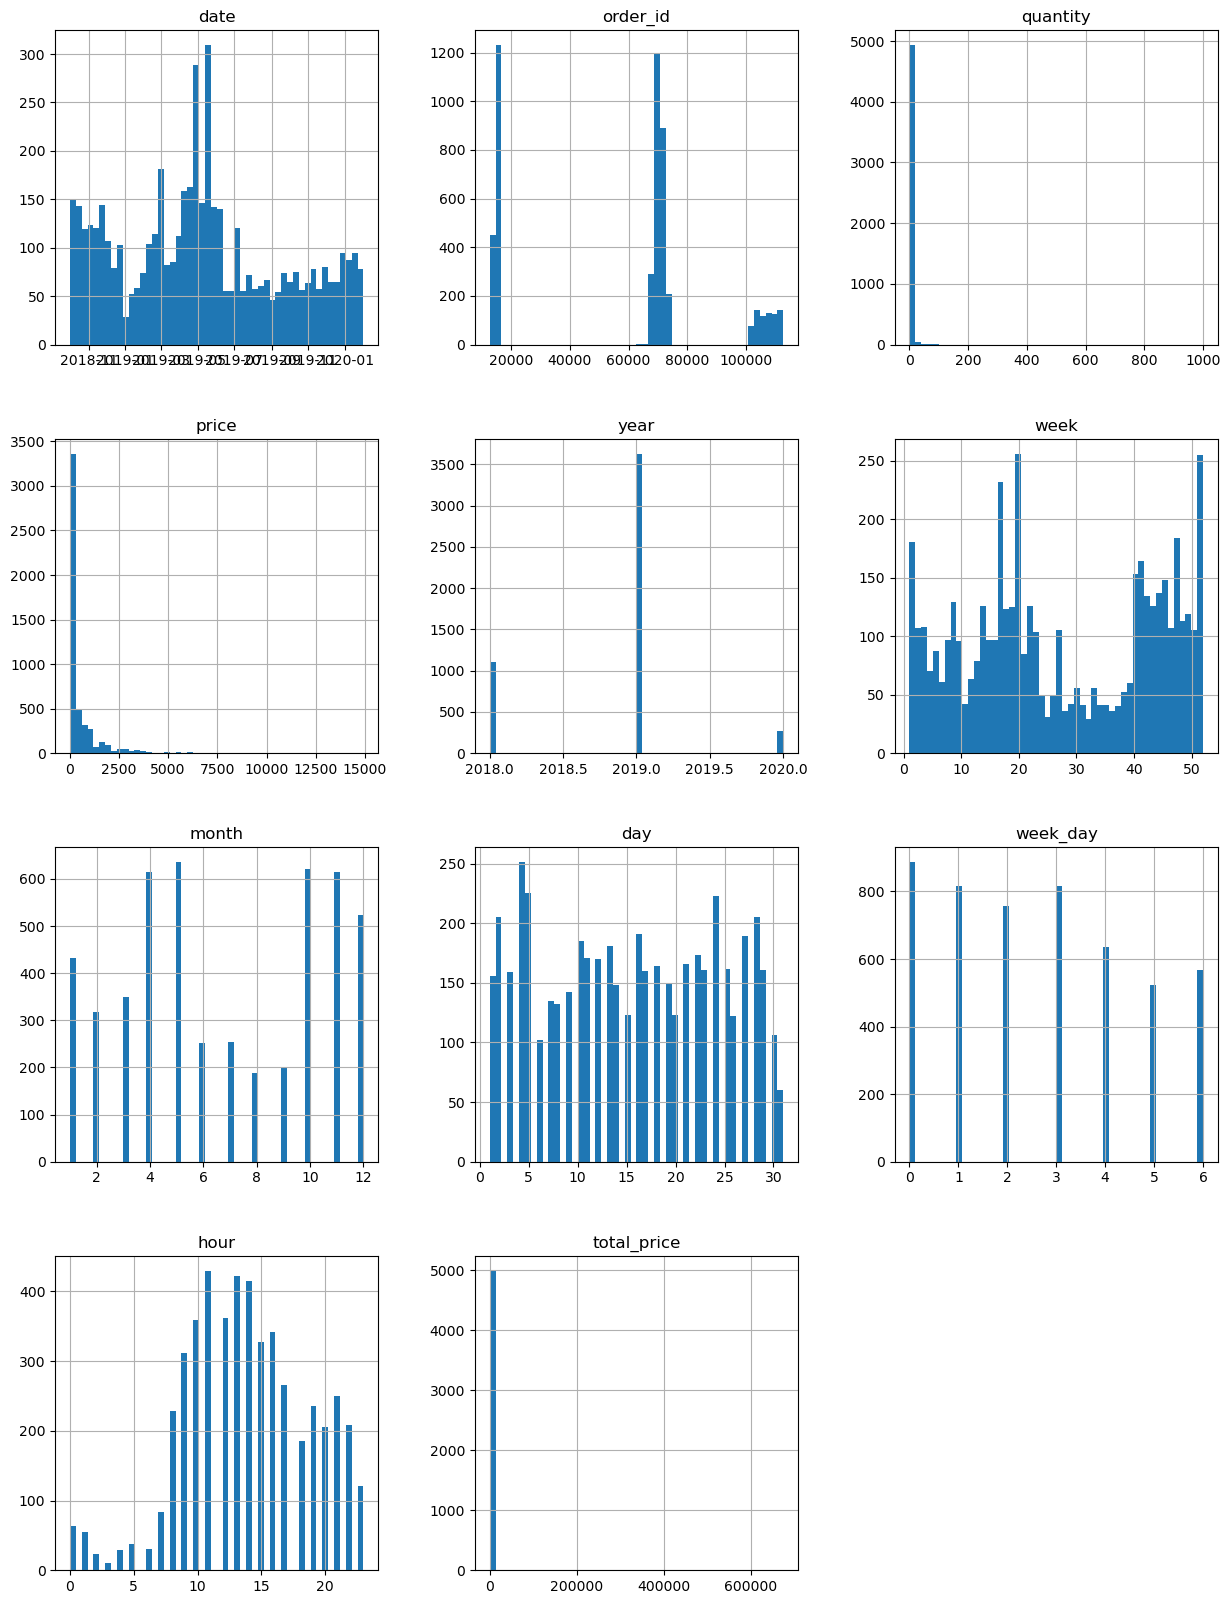

In [56]:

df.hist(figsize=(15, 20), bins=50)
None


Предварительные выводы по гистограммам (по частоте и распределению событий):

 - наблюдается неравномерное распределение по количеству заказов в течение рассматриваемого периода, есть "всплески" и провалы; 
 - вероятно, что разброс по нумерации заказов, обусловлен наличием различных категорий товаров;
 - подавляющее большинство клиентов приобретают малые партии товаров;
 - основная часть покупок - это недорогие товары;
 - наблюдается сезонность в продажах, с провалами в феврале и марте, а также в период летних отпусков (с июня по сентябрь)
 - по дням недели: больше всего продаж - в понедельник, меньше всего  - в субботу;
 - по часам: наблюдается спад продаж в ночные часы (примерно с 2-х часов до 6).
 - основная часть заказов в датасете - это заказы за 2019 г.

#### Распределение товаров по категориям

In [57]:

df_cat = df.pivot_table(index=['category'], values='product', \
                        aggfunc='nunique').sort_values('product', ascending=False).reset_index()

df_cat.columns=['category','product_counter']
df_cat


,category,product_counter
0,ХОЗТОВАРЫ,702
1,ТОВАРЫ ДЛЯ ДАЧИ,467
2,ЦВЕТЫ,309
3,ТОВАРЫ ДЛЯ ДОМА,258
4,ПОСУДА,145
5,ТОВАРЫ ДЛЯ ВАННОЙ,122
6,РАЗНОЕ,110
7,НАБОРЫ,50
8,ИСКУССТВЕННЫЕ ЦВЕТЫ,33


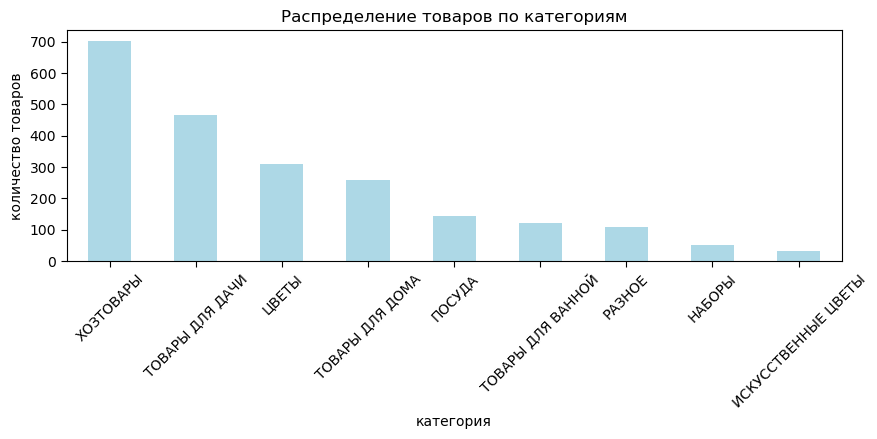

In [58]:

df_cat = df.pivot_table(index=['category'], \
                        values='product', aggfunc='nunique').sort_values('product', ascending=False).\
plot(kind='bar', figsize=(10,3), color='lightblue', legend=False, use_index=True)

plt.title('Распределение товаров по категориям', fontsize=12)
plt.xlabel("категория", fontsize=10)
plt.ylabel("количество товаров", fontsize=10)

plt.xticks(rotation=45)
plt.tick_params(length=4)

plt.show()
None


Больше всего товаров представлено в категории `ХОЗТОВАРЫ`.

#### Распределение заказов по категориям

In [59]:

df_cat = df.pivot_table(index=['category'], values='order_id', \
                        aggfunc='nunique').sort_values('order_id', ascending=False).reset_index()
df_cat.columns=['category','orders_counter']
df_cat


,category,orders_counter
0,ХОЗТОВАРЫ,1329
1,ТОВАРЫ ДЛЯ ДАЧИ,536
2,ТОВАРЫ ДЛЯ ДОМА,508
3,ЦВЕТЫ,418
4,ТОВАРЫ ДЛЯ ВАННОЙ,299
5,ПОСУДА,183
6,РАЗНОЕ,149
7,НАБОРЫ,63
8,ИСКУССТВЕННЫЕ ЦВЕТЫ,55


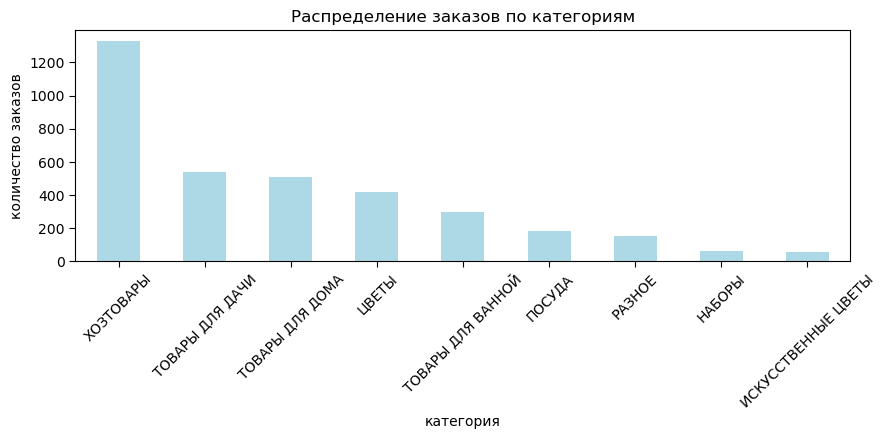

In [60]:

df_cat = df.pivot_table(index=['category'], \
                        values='order_id', aggfunc='nunique').sort_values('order_id', ascending=False).\
plot(kind='bar', figsize=(10,3), color='lightblue', legend=False, use_index=True)

plt.title('Распределение заказов по категориям', fontsize=12)
plt.xlabel("категория", fontsize=10)
plt.ylabel("количество заказов", fontsize=10)

plt.xticks(rotation=45)
plt.tick_params(length=4)

plt.show()
None


По количеству заказов также лидирует категория `ХОЗТОВАРЫ`.

#### Динамика привлечения новых пользователей по месяцам

In [61]:

df['customer_id'].describe()


count                                     5001
unique                                    2185
top       C971FB21-D54C-4134-938F-16B62EE86D3B
freq                                       142
Name: customer_id, dtype: object

In [62]:

dfc = df.pivot_table(
    index=['year','month'],  
    values='customer_id',
    aggfunc='nunique', 
    margins=True
)
dfc


customer_id
year month             
2018 10             169
     11             166
     12             202
2019 1              134
     2              219
     3              200
     4              214
     5              147
     6              132
     7              164
     8              153
     9              156
     10             152
     11             217
     12             246
2020 1              269
All                2185

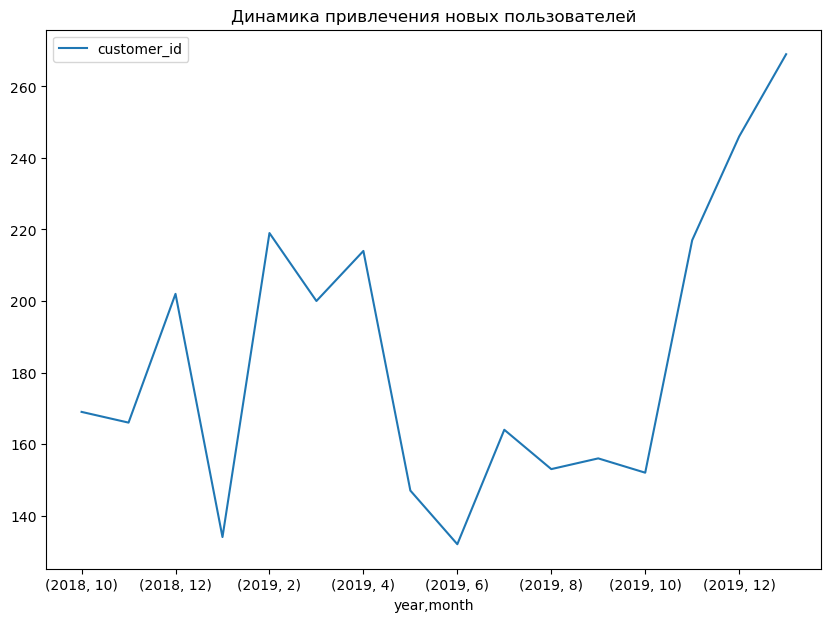

In [63]:

df.pivot_table(index=['year','month'], values='customer_id', \
               aggfunc='nunique').plot(figsize=(10, 7), title='Динамика привлечения новых пользователей')

plt.show()


Видно провал в период отпусков в летние месяцы и рост в конце года.

#### Динамика привлечения новых пользователей по категориям по месяцам

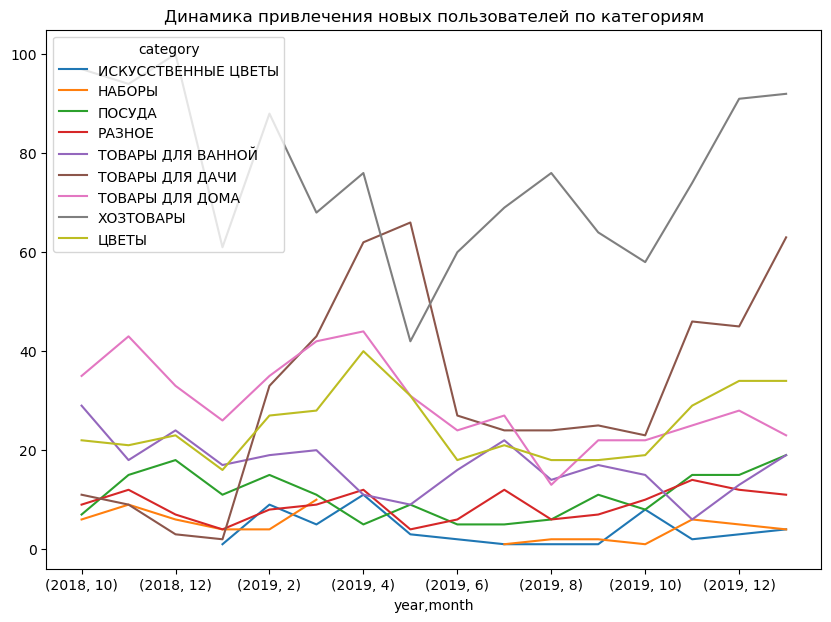

In [64]:

df.pivot_table(index=['year','month'], columns='category', values='customer_id', \
               aggfunc='nunique').plot(figsize=(10, 7), title='Динамика привлечения новых пользователей по категориям')

plt.show()


На графике видно какой вклад вносит каждая категория товара. В лидерах `ХОЗТОВАРЫ` и `ТОВАРЫ ДЛЯ ДАЧИ`.


#### Распределение заказов по покупателям
    

In [65]:

df_order_by_customer= df.groupby('customer_id').agg({'order_id' : 'nunique'}\
                                                   ).sort_values(by='order_id', ascending=False).reset_index()
df_order_by_customer.columns = ['customer_id', 'orders_counter']
df_order_by_customer.info()
df_order_by_customer.head(10)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2185 entries, 0 to 2184
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   customer_id     2185 non-null   object
 1   orders_counter  2185 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 34.3+ KB


,customer_id,orders_counter
0,C971FB21-D54C-4134-938F-16B62EE86D3B,125
1,4D93D3F6-8B24-403B-A74B-F5173E40D7DB,34
2,73D1CD35-5E5F-4629-8CF2-3FDA829D4E58,16
3,B7B865AB-0735-407F-8D0C-31F74D2806CC,7
4,E0535076-6270-4DF2-8621-CB06264A94FA,4
5,BEA7A833-2074-42DB-BC49-4457ABD3C930,4
6,498F12A4-6A62-4725-8516-CF5DC9AB8A3A,4
7,4856A2A7-B9D2-4243-B8D9-A96EC1425BBE,3
8,6B0C6CFB-7717-4C34-8535-BBC6E2B2C758,3
9,EB6521AE-56E3-4A72-9EA2-E9C69701FF3F,3


In [66]:

df_order_by_customer.describe()


,orders_counter
count,2185.000000
mean,1.481007
std,2.802199
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,125.000000


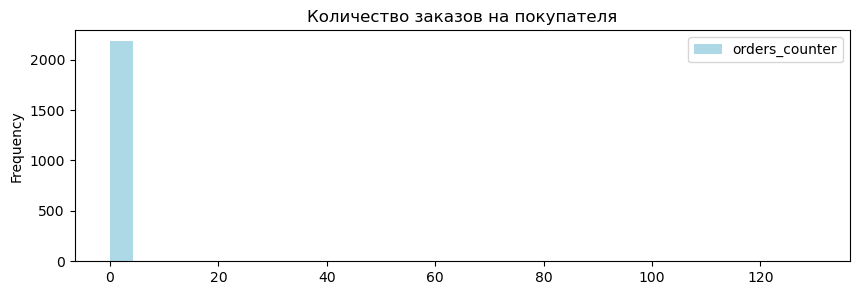

In [67]:

df_order_by_customer.plot(kind='hist', range=[0, 130],
                          bins=30,
                          title='Количество заказов на покупателя', color='lightblue',
          figsize=(10,3)
         )
None


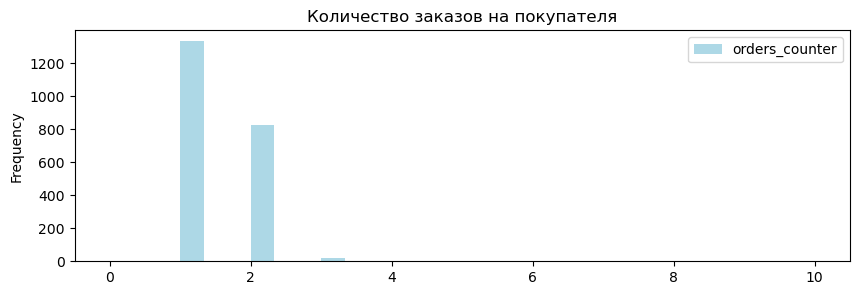

In [68]:

df_order_by_customer.plot(kind='hist', range=[0, 10],
                          bins=30,
                          title='Количество заказов на покупателя', color='lightblue',
          figsize=(10,3)
         )
None



Максимальное количество заказов - 125, минимальное - 1.   
Больше половины всех пользователей оформили не более 1 заказа, еще четверть - не более 2-х заказов.  



#### Распределение заказов по месяцам

In [69]:

df_order_by_month= df.groupby(['year', 'month']).agg({'order_id' : 'nunique'}).sort_values(by=['year', 'month']).reset_index()
df_order_by_month.columns = ['year', 'month', 'orders_counter']
df_order_by_month.info()
df_order_by_month.head(10)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   year            16 non-null     int64
 1   month           16 non-null     int64
 2   orders_counter  16 non-null     int64
dtypes: int64(3)
memory usage: 516.0 bytes


,year,month,orders_counter
0,2018,10,226
1,2018,11,192
2,2018,12,251
3,2019,1,149
4,2019,2,259
5,2019,3,213
6,2019,4,238
7,2019,5,161
8,2019,6,140
9,2019,7,175


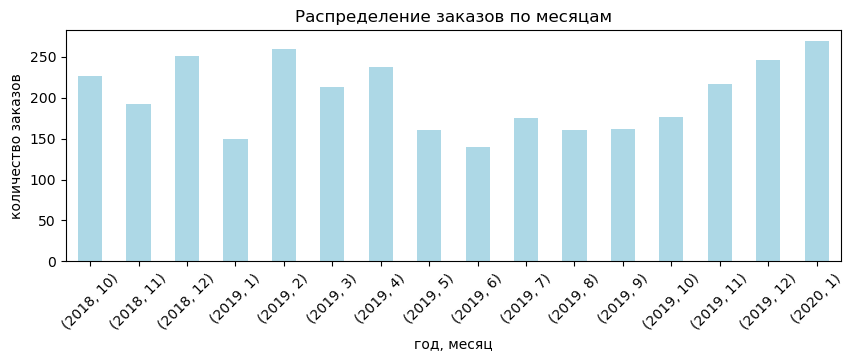

In [70]:

df.pivot_table(index=['year','month'], values='order_id', aggfunc='nunique')\
.sort_values(['year', 'month']).plot(kind='bar', figsize=(10,3), color='lightblue', 
                                          legend=False, use_index=True)

plt.title('Распределение заказов по месяцам', fontsize=12)
plt.xlabel("год, месяц", fontsize=10)
plt.ylabel("количество заказов", fontsize=10)

plt.xticks(rotation=45)

plt.show()
None


In [71]:

df.pivot_table(index=['year','month'], values='order_id', aggfunc='nunique').sort_values(['year', 'month'])


order_id
year month          
2018 10          226
     11          192
     12          251
2019 1           149
     2           259
     3           213
     4           238
     5           161
     6           140
     7           175
     8           161
     9           162
     10          177
     11          217
     12          246
2020 1           269

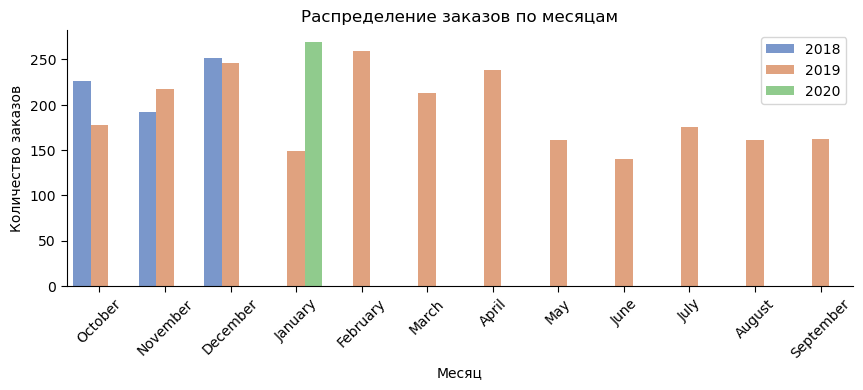

In [72]:

plot = sns.catplot(x='month_name', y='order_id', kind="bar", hue="year",alpha=.8, palette="muted", legend=False, \
    data=df.pivot_table(index=['year','month', 'month_name'], values='order_id', \
                        aggfunc='nunique').sort_values(['year', 'month']).reset_index())

plot.set_titles(row_template='2', col_template='1')

plot.fig.set_size_inches(10,3)
plt.title("Распределение заказов по месяцам", fontsize=12)
plt.xlabel('Месяц', fontsize=10)
plt.ylabel('Количество заказов', fontsize=10)
plt.xticks(rotation=45)
plt.tick_params(length=4)
plt.legend()
plt.show()


Анализ показывает, что в течение 2019 года наблюдается определенная "сезонность", например: рост продаж в феврале, марте, апреле, декабре...что, вероятнее всего, обусловлено покупками подарков к праздникам (23 февраля, 8 марта, Новый год) и подготовкой к дачному сезону (апрель).   
Если сравнить данные год к году (2018/2019) за октябрь, ноябрь и декабрь, то видно, что продажи в 2019 г. уступают 2018 г. в октябре и декабре, но превышают в ноябре.  
Существенный рост в январе 2020 г. относительно января 2019 и декабря 2019 может быть обусловлен, например, проведением  в декабре 2019 г. рекламной акции по продвижению продарочных новогодних сертификатов.

#### Распределение заказов по дням недели

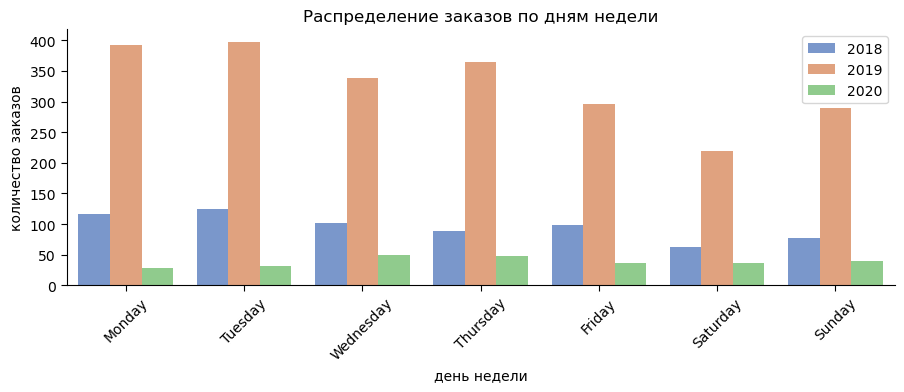

In [73]:

plot = sns.catplot(x='week_day_name', y='order_id', kind="bar", hue="year",alpha=.8, palette="muted", legend=False, \
    data=df.pivot_table(index=['year','week_day', 'week_day_name'], values='order_id', \
                        aggfunc='nunique').sort_values(['year', 'week_day']).reset_index())

plot.set_titles(row_template='2', col_template='1')

plot.fig.set_size_inches(10,3)
plt.title("Распределение заказов по дням недели", fontsize=12)
plt.xlabel('день недели', fontsize=10)
plt.ylabel('количество заказов', fontsize=10)
plt.xticks(rotation=45)
plt.tick_params(length=4)
plt.legend()
plt.show()


Анализ по дням недели показывает спад продаж по субботам. Наиболее активные продажи в общем за период наблюдаются в понедельник и вторник. При этом внутри месяца (на примере данных за январь 2020 г) активность по дням недели может различаться от месяца к месяцу.

#### Динамика выручки по месяцам и неделям

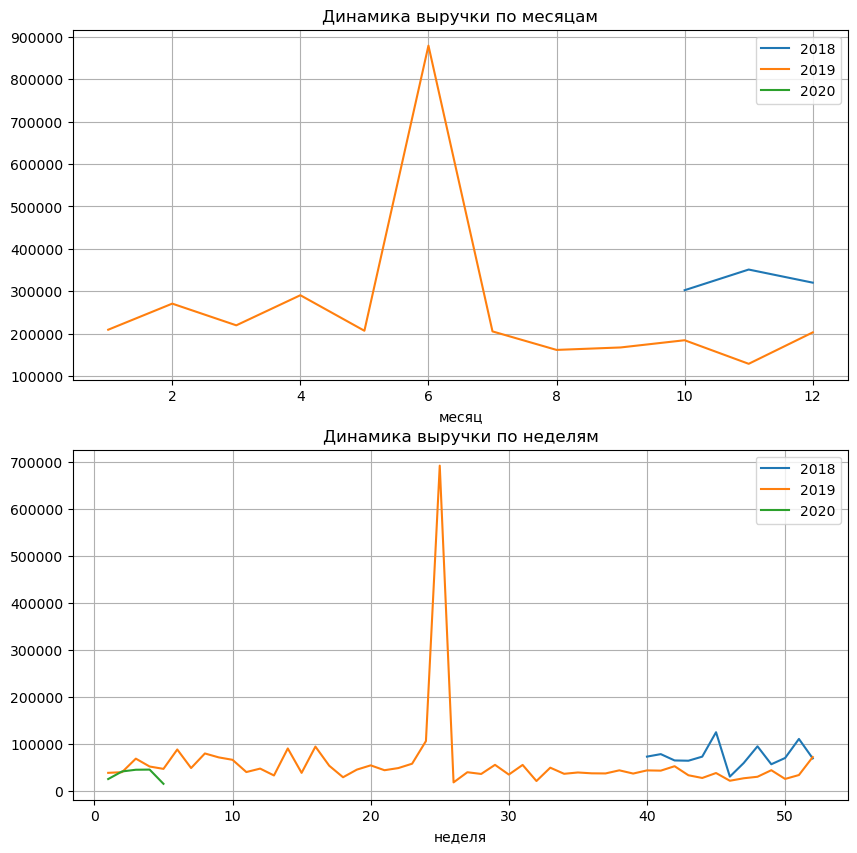

In [74]:

plt.figure(figsize=(12, 10))

#------------------------------------------------

ax1 = plt.subplot(2, 1, 1)
df.pivot_table(index='month', columns='year', values = 'total_price', aggfunc = 'sum').plot(
    grid=True, ax=ax1, figsize=(10, 10)
)

plt.legend()
plt.xlabel('месяц')
plt.title('Динамика выручки по месяцам')

#------------------------------------------------

ax2 = plt.subplot(2, 1, 2)

df.pivot_table(index='week', columns='year', values = 'total_price', aggfunc = 'sum').plot(
    grid=True, ax=ax2, figsize=(10, 10)
)
 
plt.legend()
plt.xlabel('неделя')
plt.title('Динамика выручки по неделям')
#------------------------------------------------

None


Мы видим всплеск в июне 2019 г, когда были закуплены крупные оптовые партии отдельных товаров. А также заметен спад, начиная с июля 2019 и до конца 2019 года.

#### Динамика среднего чека по месяцам

In [75]:

df.head()


,date,customer_id,order_id,product,quantity,price,year,week,month,month_name,day,week_day,week_day_name,hour,total_price,product_sstr,category
0,2018-10-01,EE47D746-6D2F-4D3C-9622-C31412542920,68477,"КОМНАТНОЕ РАСТЕНИЕ В ГОРШКЕ АЛОЕ ВЕРА, D12, H30",1,142.0,2018,40,10,October,1,0,Monday,0,142.0,КОМНАТНОЕ,ЦВЕТЫ
1,2018-10-01,EE47D746-6D2F-4D3C-9622-C31412542920,68477,"КОМНАТНОЕ РАСТЕНИЕ В ГОРШКЕ КОФЕ АРАБИКА, D12, H25",1,194.0,2018,40,10,October,1,0,Monday,0,194.0,КОМНАТНОЕ,ЦВЕТЫ
2,2018-10-01,EE47D746-6D2F-4D3C-9622-C31412542920,68477,РАДЕРМАХЕРА D-12 СМ H-20 СМ,1,112.0,2018,40,10,October,1,0,Monday,0,112.0,РАДЕРМАХЕРА,ЦВЕТЫ
3,2018-10-01,EE47D746-6D2F-4D3C-9622-C31412542920,68477,ХРИЗОЛИДОКАРПУС ЛУТЕСЦЕНС D-9 СМ,1,179.0,2018,40,10,October,1,0,Monday,0,179.0,ХРИЗОЛИДОКАРПУС,ЦВЕТЫ
4,2018-10-01,EE47D746-6D2F-4D3C-9622-C31412542920,68477,ЦИПЕРУС ЗУМУЛА D-12 СМ H-25 СМ,1,112.0,2018,40,10,October,1,0,Monday,0,112.0,ЦИПЕРУС,ЦВЕТЫ


In [76]:

cheque = df.groupby(df['date'].dt.strftime('%Y.%m')).agg({'total_price': 'sum','order_id': 'nunique'}\
                                                        ).reset_index(inplace = False)
cheque.columns = ['date', 'total_price', 'orders_counter']
cheque['cheque_avg'] = cheque['total_price']/cheque['orders_counter']
cheque.head()


,date,total_price,orders_counter,cheque_avg
0,2018.10,302390.0,226,1338.008850
1,2018.11,351120.0,192,1828.750000
2,2018.12,320184.0,251,1275.633466
3,2019.01,209208.0,149,1404.080537
4,2019.02,270730.0,259,1045.289575


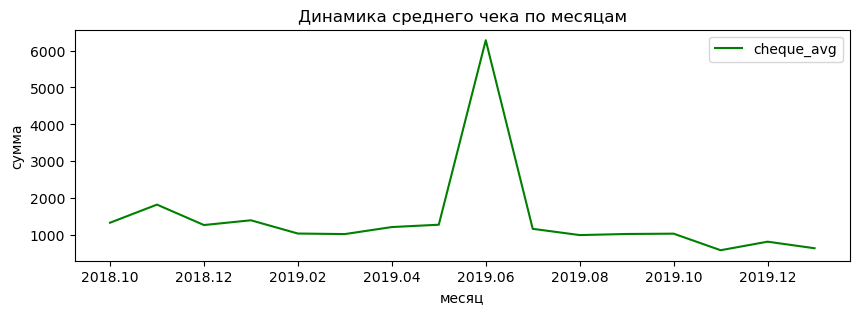

In [77]:

cheque.plot(x='date', y='cheque_avg', figsize=(10, 3), color='green')

plt.xlabel('месяц')
plt.ylabel('сумма')
plt.title('Динамика среднего чека по месяцам', fontsize = 12)

plt.show();


Анализ за весь период показывает отрицательную динамику за исключением всплеска в июне 2019 г. (оптовые покупки).
Рассмотрим далее динамику среднего чека по категориям товаров.

In [78]:

cheque = df.groupby([df['date'].dt.strftime('%Y.%m'), 'category']).agg({'total_price': 'sum','order_id': 'nunique'}\
                                                        ).reset_index(inplace = False).sort_values(['date','category'])
cheque.columns = ['date', 'category', 'total_price', 'orders_counter']
cheque['cheque_avg'] = cheque['total_price']/cheque['orders_counter']
cheque.head()


,date,category,total_price,orders_counter,cheque_avg
0,2018.10,ИСКУССТВЕННЫЕ ЦВЕТЫ,1144.0,3,381.333333
1,2018.10,НАБОРЫ,11788.0,7,1684.000000
2,2018.10,ПОСУДА,12765.0,10,1276.500000
3,2018.10,РАЗНОЕ,6365.0,9,707.222222
4,2018.10,ТОВАРЫ ДЛЯ ВАННОЙ,34709.0,38,913.394737


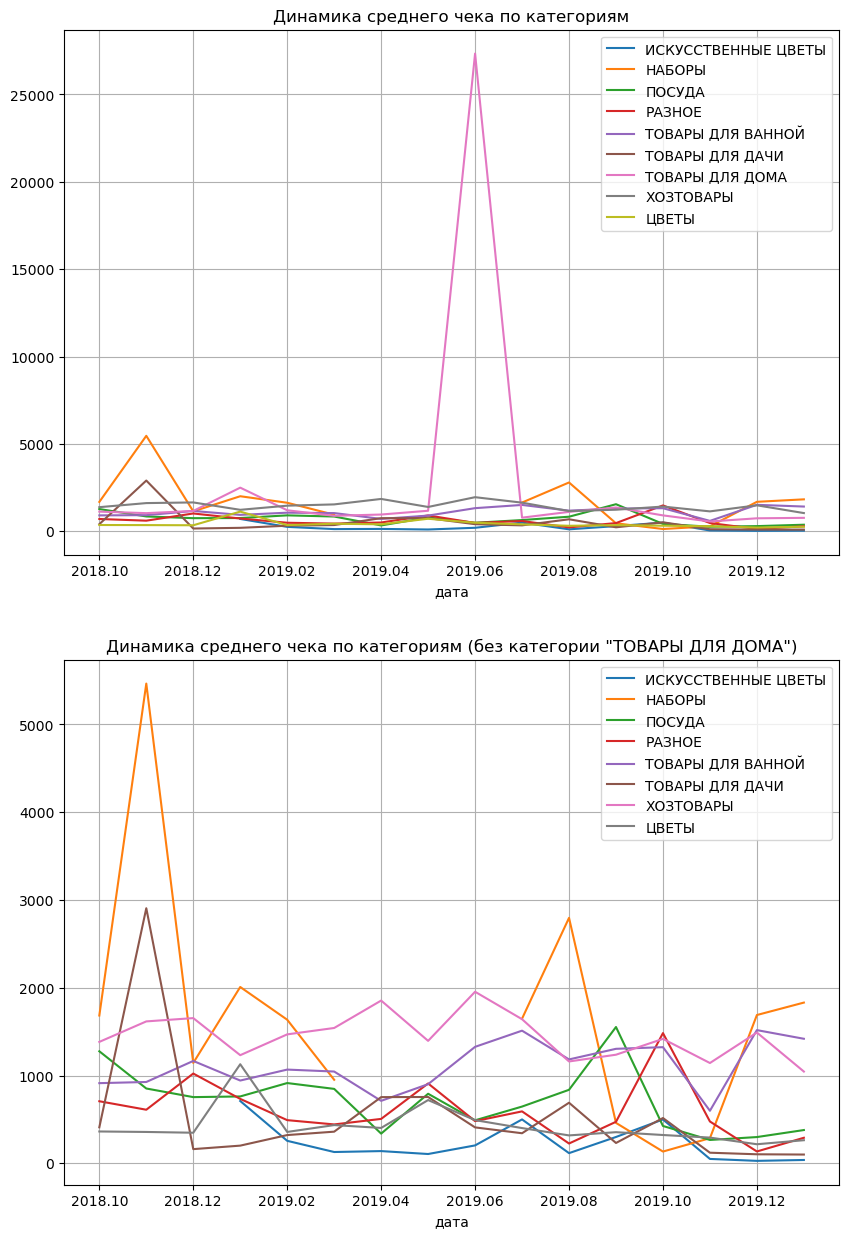

In [79]:

plt.figure(figsize=(15, 10))

#------------------------------------------------

ax1 = plt.subplot(2, 1, 1)
cheque.pivot_table(index=['date'], columns='category', values = 'cheque_avg', aggfunc = 'sum').plot(
    grid=True, ax=ax1, figsize=(10, 15)
)

plt.legend()
plt.xlabel('дата')
plt.title('Динамика среднего чека по категориям')

#------------------------------------------------

ax2 = plt.subplot(2, 1, 2)

cheque.pivot_table(index=['date'], columns='category', \
                   values = 'cheque_avg', aggfunc = 'sum').drop(columns=['ТОВАРЫ ДЛЯ ДОМА']).plot(
    grid=True, ax=ax2, figsize=(10, 15)
)
 
plt.legend()
plt.xlabel('дата')
plt.title('Динамика среднего чека по категориям (без категории "ТОВАРЫ ДЛЯ ДОМА")')
#------------------------------------------------

None



Анализ динамики среднего чека по категориям товаров показывает наиболее существенные "провалы" в категории "НАБОРЫ" и "качели" в остальных категориях.

### Сегментация пользователей

#### Сегменты по количеству оформленных заказов

In [80]:

df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 5001 entries, 0 to 7473
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           5001 non-null   datetime64[ns]
 1   customer_id    5001 non-null   object        
 2   order_id       5001 non-null   int64         
 3   product        5001 non-null   object        
 4   quantity       5001 non-null   int64         
 5   price          5001 non-null   float64       
 6   year           5001 non-null   int64         
 7   week           5001 non-null   int64         
 8   month          5001 non-null   int64         
 9   month_name     5001 non-null   object        
 10  day            5001 non-null   int64         
 11  week_day       5001 non-null   int64         
 12  week_day_name  5001 non-null   object        
 13  hour           5001 non-null   int64         
 14  total_price    5001 non-null   float64       
 15  product_sstr   5001 n

,date,customer_id,order_id,product,quantity,price,year,week,month,month_name,day,week_day,week_day_name,hour,total_price,product_sstr,category
0,2018-10-01,EE47D746-6D2F-4D3C-9622-C31412542920,68477,"КОМНАТНОЕ РАСТЕНИЕ В ГОРШКЕ АЛОЕ ВЕРА, D12, H30",1,142.0,2018,40,10,October,1,0,Monday,0,142.0,КОМНАТНОЕ,ЦВЕТЫ
1,2018-10-01,EE47D746-6D2F-4D3C-9622-C31412542920,68477,"КОМНАТНОЕ РАСТЕНИЕ В ГОРШКЕ КОФЕ АРАБИКА, D12, H25",1,194.0,2018,40,10,October,1,0,Monday,0,194.0,КОМНАТНОЕ,ЦВЕТЫ
2,2018-10-01,EE47D746-6D2F-4D3C-9622-C31412542920,68477,РАДЕРМАХЕРА D-12 СМ H-20 СМ,1,112.0,2018,40,10,October,1,0,Monday,0,112.0,РАДЕРМАХЕРА,ЦВЕТЫ
3,2018-10-01,EE47D746-6D2F-4D3C-9622-C31412542920,68477,ХРИЗОЛИДОКАРПУС ЛУТЕСЦЕНС D-9 СМ,1,179.0,2018,40,10,October,1,0,Monday,0,179.0,ХРИЗОЛИДОКАРПУС,ЦВЕТЫ
4,2018-10-01,EE47D746-6D2F-4D3C-9622-C31412542920,68477,ЦИПЕРУС ЗУМУЛА D-12 СМ H-25 СМ,1,112.0,2018,40,10,October,1,0,Monday,0,112.0,ЦИПЕРУС,ЦВЕТЫ


Определим количество уникальных пользователей в датасете.

In [81]:

print()
print('Количество уникальных пользователей в датасете: ', len(df['customer_id'].unique()))
print()



Количество уникальных пользователей в датасете:  2185



Разделим всех пользователей на сегменты в зависимости от количества сделанных заказов.
Построим сводную таблицу для оценки...

In [82]:

df_seg_orders_num = df.pivot_table(index='customer_id', values='order_id',\
                                   aggfunc='nunique').sort_values('order_id', ascending=False).reset_index()
df_seg_orders_num.columns = ['customer_id', 'orders_counter']
df_seg_orders_num.head(10)


,customer_id,orders_counter
0,C971FB21-D54C-4134-938F-16B62EE86D3B,125
1,4D93D3F6-8B24-403B-A74B-F5173E40D7DB,34
2,73D1CD35-5E5F-4629-8CF2-3FDA829D4E58,16
3,B7B865AB-0735-407F-8D0C-31F74D2806CC,7
4,E0535076-6270-4DF2-8621-CB06264A94FA,4
5,BEA7A833-2074-42DB-BC49-4457ABD3C930,4
6,498F12A4-6A62-4725-8516-CF5DC9AB8A3A,4
7,4856A2A7-B9D2-4243-B8D9-A96EC1425BBE,3
8,6B0C6CFB-7717-4C34-8535-BBC6E2B2C758,3
9,EB6521AE-56E3-4A72-9EA2-E9C69701FF3F,3


In [83]:

df_seg_orders_num.tail(5)


,customer_id,orders_counter
2180,6E34F9F8-2E96-48D3-A282-66C71A43BF48,1
2181,6DDD4081-515E-401A-9567-8C0EAB6DC868,1
2182,6DBAE21E-4B94-4B16-9548-24AADF146AE2,1
2183,6DA7E5E8-060B-4116-91EF-015B33965D68,1
2184,FFE82299-3F5B-4214-87FE-3D36ECCCFAC3,1


In [84]:

print()
print('Всего уникальных значений - вариантов по количеству заказов: ', len(df_seg_orders_num['orders_counter'].unique()))
print()



Всего уникальных значений - вариантов по количеству заказов:  8




Распределение количества пользователей по количеству заказов:


In [85]:

df_seg_orders_num_usr = df_seg_orders_num.groupby(['orders_counter']).agg(
    {'customer_id' : 'count'}).sort_values('customer_id', ascending=False).reset_index()

df_seg_orders_num_usr.columns = ['orders_counter', 'customers_counter']
df_seg_orders_num_usr


,orders_counter,customers_counter
0,1,1333
1,2,826
2,3,19
3,4,3
4,7,1
5,16,1
6,34,1
7,125,1


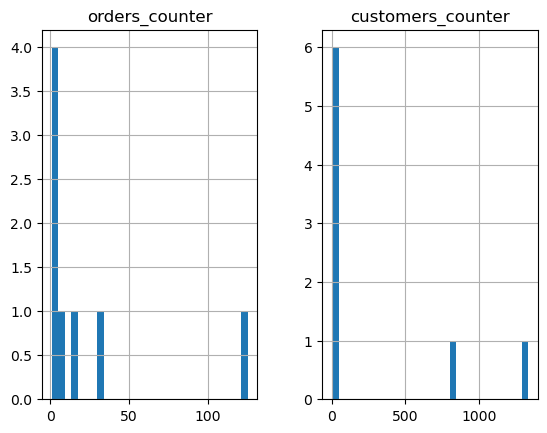

In [86]:

df_seg_orders_num_usr.hist(bins=30)
None


In [87]:

df_seg_orders_num_usr['customers_counter'].describe()


count       8.000000
mean      273.125000
std       515.857244
min         1.000000
25%         1.000000
50%         2.000000
75%       220.750000
max      1333.000000
Name: customers_counter, dtype: float64

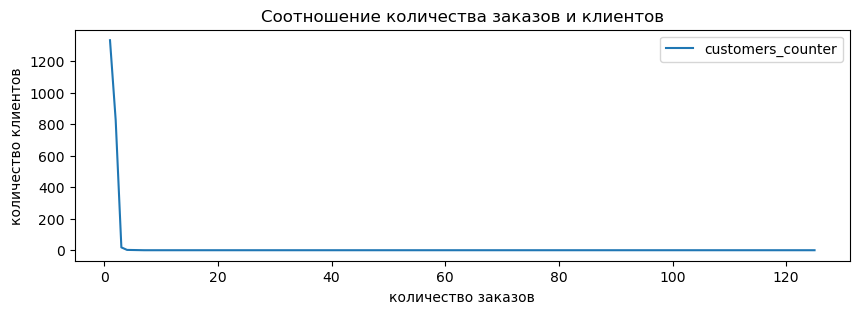

In [88]:

df_seg_orders_num_usr.plot(x='orders_counter', y='customers_counter', figsize=(10, 3))

plt.xlabel('количество заказов')
plt.ylabel('количество клиентов')
plt.title('Соотношение количества заказов и клиентов', fontsize = 12)

plt.show();


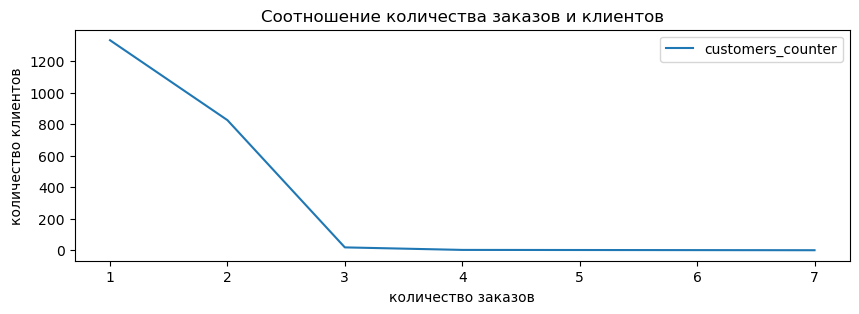

In [89]:

df_seg_orders_num_usr.query('orders_counter < 10').plot(x='orders_counter', \
                                                        y='customers_counter', figsize=(10, 3))

plt.xlabel('количество заказов')
plt.ylabel('количество клиентов')
plt.title('Соотношение количества заказов и клиентов', fontsize = 12)

plt.show();


Анализ показывает, что большая часть пользователей оформили 1 или 2 заказа. Поэтому по количеству сделанных заказов целесообразно разделить всех клиентов на 3 категории:  
 - 'один заказ'
 - 'два заказа'
 - 'более двух заказов'.

Определим функцию для формирования категорий при сегментировании клиентов по количеству сделанных заказов:

In [90]:

def create_segment_1_category(_df_):                   
    
    _df_.loc[_df_['orders_counter'] == 1, 'seg_1_category'] = 'один заказ'
    
    _df_.loc[_df_['orders_counter'] == 2, 'seg_1_category'] = 'два заказа'
    
    _df_.loc[_df_['orders_counter'] > 2, 'seg_1_category'] = 'более двух заказов'
    
                     
    return _df_

In [91]:

df_usr_segments_1 = create_segment_1_category(df_seg_orders_num)
df_usr_segments_1.head(5)


,customer_id,orders_counter,seg_1_category
0,C971FB21-D54C-4134-938F-16B62EE86D3B,125,более двух заказов
1,4D93D3F6-8B24-403B-A74B-F5173E40D7DB,34,более двух заказов
2,73D1CD35-5E5F-4629-8CF2-3FDA829D4E58,16,более двух заказов
3,B7B865AB-0735-407F-8D0C-31F74D2806CC,7,более двух заказов
4,E0535076-6270-4DF2-8621-CB06264A94FA,4,более двух заказов


In [92]:

df_usr_segments_1.tail(5)


,customer_id,orders_counter,seg_1_category
2180,6E34F9F8-2E96-48D3-A282-66C71A43BF48,1,один заказ
2181,6DDD4081-515E-401A-9567-8C0EAB6DC868,1,один заказ
2182,6DBAE21E-4B94-4B16-9548-24AADF146AE2,1,один заказ
2183,6DA7E5E8-060B-4116-91EF-015B33965D68,1,один заказ
2184,FFE82299-3F5B-4214-87FE-3D36ECCCFAC3,1,один заказ


**Оформляем сегментацию  в виде сводной таблицы с категориями и идентификаторами пользователей.**

In [93]:

df_segment_1 = df_usr_segments_1.pivot_table(\
                                          index=['seg_1_category', 'customer_id'],\
                                          values='orders_counter', aggfunc='sum').sort_values('orders_counter', ascending=False)

df_segment_1.info()
df_segment_1.head()


<class 'pandas.core.frame.DataFrame'>
MultiIndex: 2185 entries, ('более двух заказов', 'C971FB21-D54C-4134-938F-16B62EE86D3B') to ('один заказ', 'FFE82299-3F5B-4214-87FE-3D36ECCCFAC3')
Data columns (total 1 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   orders_counter  2185 non-null   int64
dtypes: int64(1)
memory usage: 40.7+ KB


orders_counter
seg_1_category     customer_id                                         
более двух заказов C971FB21-D54C-4134-938F-16B62EE86D3B             125
                   4D93D3F6-8B24-403B-A74B-F5173E40D7DB              34
                   73D1CD35-5E5F-4629-8CF2-3FDA829D4E58              16
                   B7B865AB-0735-407F-8D0C-31F74D2806CC               7
                   498F12A4-6A62-4725-8516-CF5DC9AB8A3A               4

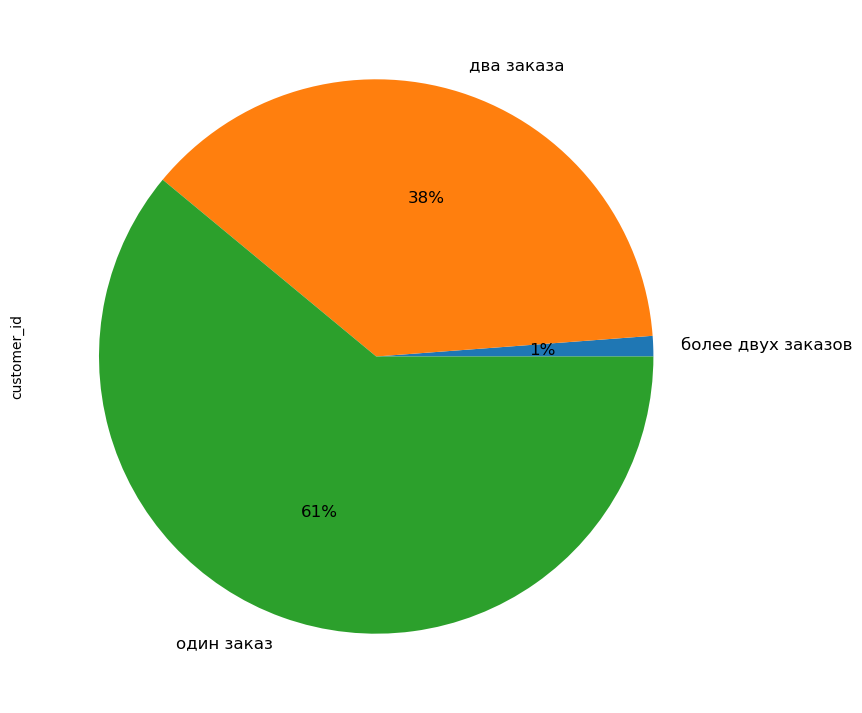

In [94]:

df_usr_segments_1.groupby('seg_1_category')['customer_id'].agg('count').sort_values().plot(kind='pie', \
                                                                       fontsize=12, autopct='%1.0f%%', figsize=(10, 9))
None


Распределение пользователей по количеству заказов:  

- 61% клиентов: оформили 1 заказ
- 38% клиентов: оформили 2 заказа
- 1% клиентов: оформили более 2 заказов.  

Сегментация по количеству заказов позволит далее изучить клиентов по сегментам, например, для разработки мероприятий по привлечению/удержанию клиентов.


#### Сегменты по категориям товаров

Разделим всех пользователей на сегменты в зависимости от категории приобретаемых товаров.
Построим сводную таблицу для оценки...

In [95]:

df_seg_product_cat = df.pivot_table(index=['category','customer_id'], values='order_id',\
                                   aggfunc='nunique').sort_values(['category', 'order_id'], ascending=False).reset_index()
df_seg_product_cat.columns = ['category','customer_id', 'orders_counter']
df_seg_product_cat.info()
df_seg_product_cat.head(5)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3059 entries, 0 to 3058
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   category        3059 non-null   object
 1   customer_id     3059 non-null   object
 2   orders_counter  3059 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 71.8+ KB


,category,customer_id,orders_counter
0,ЦВЕТЫ,C971FB21-D54C-4134-938F-16B62EE86D3B,11
1,ЦВЕТЫ,41117D9D-94F7-4145-A8C9-CB6675CE7674,3
2,ЦВЕТЫ,E8204583-4D55-4724-AD3F-049C7DB43BDD,3
3,ЦВЕТЫ,01F95D43-4A8D-45E5-9C23-CCCD211E6D30,2
4,ЦВЕТЫ,080AC19B-4BEB-49D7-B960-5CF01C5638EF,2


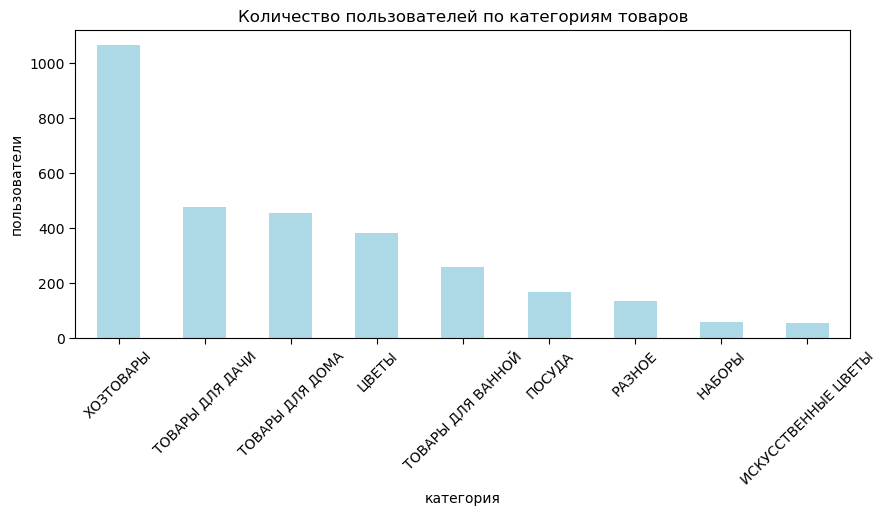

In [96]:

df_cat = df.pivot_table(index=['category'], \
                        values='customer_id', aggfunc='nunique').sort_values('customer_id', ascending=False).\
plot(kind='bar', figsize=(10,4), color='lightblue', legend=False, use_index=True)

plt.title('Количество пользователей по категориям товаров', fontsize=12)
plt.xlabel("категория", fontsize=10)
plt.ylabel("пользователи", fontsize=10)

plt.xticks(rotation=45)
plt.tick_params(length=4)

plt.show()
None


 По количеству клиентов лидируют категории ХОЗТОВАРЫ, ТОВАРЫ ДЛЯ ДАЧИ, ТОВАРЫ ДЛЯ ДОМА и ЦВЕТЫ.  
 С учетом предпочтений отдельных категорий товаров можно использовать эту сегментацию, например, для персонализированных рекламных рассылок.

#### Сегменты по среднему чеку

In [97]:

df.head(5)


,date,customer_id,order_id,product,quantity,price,year,week,month,month_name,day,week_day,week_day_name,hour,total_price,product_sstr,category
0,2018-10-01,EE47D746-6D2F-4D3C-9622-C31412542920,68477,"КОМНАТНОЕ РАСТЕНИЕ В ГОРШКЕ АЛОЕ ВЕРА, D12, H30",1,142.0,2018,40,10,October,1,0,Monday,0,142.0,КОМНАТНОЕ,ЦВЕТЫ
1,2018-10-01,EE47D746-6D2F-4D3C-9622-C31412542920,68477,"КОМНАТНОЕ РАСТЕНИЕ В ГОРШКЕ КОФЕ АРАБИКА, D12, H25",1,194.0,2018,40,10,October,1,0,Monday,0,194.0,КОМНАТНОЕ,ЦВЕТЫ
2,2018-10-01,EE47D746-6D2F-4D3C-9622-C31412542920,68477,РАДЕРМАХЕРА D-12 СМ H-20 СМ,1,112.0,2018,40,10,October,1,0,Monday,0,112.0,РАДЕРМАХЕРА,ЦВЕТЫ
3,2018-10-01,EE47D746-6D2F-4D3C-9622-C31412542920,68477,ХРИЗОЛИДОКАРПУС ЛУТЕСЦЕНС D-9 СМ,1,179.0,2018,40,10,October,1,0,Monday,0,179.0,ХРИЗОЛИДОКАРПУС,ЦВЕТЫ
4,2018-10-01,EE47D746-6D2F-4D3C-9622-C31412542920,68477,ЦИПЕРУС ЗУМУЛА D-12 СМ H-25 СМ,1,112.0,2018,40,10,October,1,0,Monday,0,112.0,ЦИПЕРУС,ЦВЕТЫ


In [98]:

df_users_cheque = df.groupby(['customer_id', 'order_id']).agg({'quantity': 'sum', 'total_price': 'sum'}).reset_index()

df_users_cheque.columns = ['customer_id', 'order_id', 'items_counter', 'total_amount']

df_users_cheque.head()


,customer_id,order_id,items_counter,total_amount
0,000D6849-084E-4D9F-AC03-37174EAF60C4,14943,4,555.0
1,001CEE7F-0B29-4716-B202-0042213AB038,70290,1,442.0
2,00299F34-5385-4D13-9AEA-C80B81658E1B,72965,2,914.0
3,002D4D3A-4A59-406B-86EC-C3314357E498,69990,1,1649.0
4,003BBD39-0000-41FF-B7F9-2DDAEC152037,72796,2,2324.0


In [99]:
#---- посчитаем среднее количество товаров в заказе + общую стоимость заказов + среднюю стоимость заказа


df_users_cheque = df_users_cheque.groupby('customer_id').agg({'items_counter': 'mean',\
                                                              'total_amount':['sum', 'mean']}).reset_index()

df_users_cheque.head()



customer_id items_counter total_amount        
                                                 mean          sum    mean
0  000D6849-084E-4D9F-AC03-37174EAF60C4           4.0        555.0   555.0
1  001CEE7F-0B29-4716-B202-0042213AB038           1.0        442.0   442.0
2  00299F34-5385-4D13-9AEA-C80B81658E1B           2.0        914.0   914.0
3  002D4D3A-4A59-406B-86EC-C3314357E498           1.0       1649.0  1649.0
4  003BBD39-0000-41FF-B7F9-2DDAEC152037           2.0       2324.0  2324.0

Сегменты по среднему чеку можно в дальнейшейм использовать, например,  для персонализированных рекламных рассылок с учетом соответствующего ценового диапазона.

#### Сегменты (RFM-анализ)

**RFM** — это метод, используемый для анализа потребительской ценности, группирует клиентов на основе истории их транзакций:

**Recency (Давность)** — Как давно клиент совершил покупку?  

**Frequency (Частота)** — Как часто они совершают покупки?  

**Monetary Value** (Денежная ценность) — Сколько они тратят?

Максимальная дата в датасете:

In [100]:

max_order_date_value = df['date'].max()
print(max_order_date_value)


2020-01-31 15:00:00


Сформируем RFM-таблицу:

In [101]:

df_RFM = df.groupby('customer_id').agg({'date': lambda x: (max_order_date_value - x.max()).days, # Recency
                                        'order_id': lambda x: len(x.unique()), # Frequency
                                        'total_price': lambda x: x.sum()})    # Monetary 

df_RFM['date'] = df_RFM['date'].astype(int)

df_RFM.rename(columns={'date': 'recency', 
                         'order_id': 'frequency',
                         'total_price': 'monetary'}, inplace=True)
df_RFM.head()



,recency,frequency,monetary
customer_id,,,
000D6849-084E-4D9F-AC03-37174EAF60C4,107,1,555.0
001CEE7F-0B29-4716-B202-0042213AB038,349,1,442.0
00299F34-5385-4D13-9AEA-C80B81658E1B,108,1,914.0
002D4D3A-4A59-406B-86EC-C3314357E498,368,1,1649.0
003BBD39-0000-41FF-B7F9-2DDAEC152037,123,1,2324.0


Для расчета показателя RFM будем использовать квантили.

In [102]:

quantiles = df_RFM.quantile(q=[0.25,0.5,0.75])
quantiles


,recency,frequency,monetary
0.25,65.0,1.0,402.0
0.50,191.0,1.0,845.5
0.75,338.0,2.0,1799.0


Выполним сегментацию и определим RFM-классы (комбинации значений R, F и M).

In [103]:
quantiles = quantiles.to_dict()
quantiles

{'recency': {0.25: 65.0, 0.5: 191.0, 0.75: 338.0},
 'frequency': {0.25: 1.0, 0.5: 1.0, 0.75: 2.0},
 'monetary': {0.25: 402.0, 0.5: 845.5, 0.75: 1799.0}}

In [104]:

##  RFM - сегментация ----

RFM_Segment = df_RFM.copy()

#---------------

def R_Class(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1
    
#---------------

def FM_Class(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4
    
RFM_Segment['R_Quartile'] = RFM_Segment['recency'].apply(R_Class, args=('recency',quantiles,))

RFM_Segment['F_Quartile'] = RFM_Segment['frequency'].apply(FM_Class, args=('frequency',quantiles,))

RFM_Segment['M_Quartile'] = RFM_Segment['monetary'].apply(FM_Class, args=('monetary',quantiles,))

RFM_Segment['RFMClass'] = RFM_Segment.R_Quartile.map(str) + RFM_Segment.F_Quartile.map(str) + RFM_Segment.M_Quartile.map(str)


RFM_Segment.info()

RFM_Segment.sort_values('RFMClass', ascending=False).head(15)


<class 'pandas.core.frame.DataFrame'>
Index: 2185 entries, 000D6849-084E-4D9F-AC03-37174EAF60C4 to FFE82299-3F5B-4214-87FE-3D36ECCCFAC3
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   recency     2185 non-null   int32  
 1   frequency   2185 non-null   int64  
 2   monetary    2185 non-null   float64
 3   R_Quartile  2185 non-null   int64  
 4   F_Quartile  2185 non-null   int64  
 5   M_Quartile  2185 non-null   int64  
 6   RFMClass    2185 non-null   object 
dtypes: float64(1), int32(1), int64(4), object(1)
memory usage: 128.0+ KB


,recency,frequency,monetary,R_Quartile,F_Quartile,M_Quartile,RFMClass
customer_id,,,,,,,
6F977064-EBCB-45D0-9115-4C641341FCC8,14,2,4731.0,4,3,4,434
952CD551-78D7-4D6E-815E-D2335CAC37B5,11,2,2570.0,4,3,4,434
1A32C1A4-5862-4896-8671-FA4C1FFCF0C4,43,2,2605.0,4,3,4,434
904015BA-31F2-4CE4-B68E-02362280A43D,2,2,1821.0,4,3,4,434
1AECD6CC-AD83-4136-9124-061918FFBD36,65,2,4349.0,4,3,4,434
DCA2ED18-F11F-42D8-A4AE-3295950E39FE,51,2,3189.5,4,3,4,434
DC9EEB94-819E-46A0-9F40-28562193626B,56,2,4117.5,4,3,4,434
91AAC803-C8FC-44FD-A1D7-494E16E2AC2D,24,2,5871.0,4,3,4,434
DC6C2A43-8B28-495D-854B-12C8CC73470E,51,2,2818.0,4,3,4,434


In [105]:

RFM_Segment.describe()


,recency,frequency,monetary,R_Quartile,F_Quartile,M_Quartile
count,2185.000000,2185.000000,2185.000000,2185.000000,2185.000000,2185.000000
mean,207.510755,1.481007,1956.077994,2.503432,1.791762,2.496568
std,151.074709,2.802199,15055.371137,1.119308,0.996388,1.118489
min,0.000000,1.000000,15.000000,1.000000,1.000000,1.000000
25%,65.000000,1.000000,402.000000,2.000000,1.000000,1.000000
50%,191.000000,1.000000,845.500000,3.000000,1.000000,2.000000
75%,338.000000,2.000000,1799.000000,4.000000,3.000000,3.000000
max,487.000000,125.000000,675000.000000,4.000000,4.000000,4.000000


Далее по полученной RFM-сегментации Заказчик получает возможность по требуемым сегментам изучать клиентов (примеры ряда запросов приведены ниже) и планировать необходимые мероприятия и акции. 

Посмотрим, кто лучшие клиенты (часто бывают, часто покупают, много тратят)?

In [106]:

#RFMClass = 434 (часто бывают,часто покупают, много тратят)
RFM_Segment[RFM_Segment['RFMClass']=='434'].sort_values('monetary', ascending=False).head()


,recency,frequency,monetary,R_Quartile,F_Quartile,M_Quartile,RFMClass
customer_id,,,,,,,
F279D50F-A508-40B4-BDE5-5CB4A1BE3AD0,31,2,16557.0,4,3,4,434
B7DFFBD3-810C-4125-889A-454EE093EB73,8,2,10168.0,4,3,4,434
AC250053-A236-467A-97D2-DDBB9BF4A1BA,49,2,8684.0,4,3,4,434
B16A52B7-499B-4BE8-9220-19076ED22BC9,43,2,8307.0,4,3,4,434
9704352F-7F7F-4FA7-AA1C-64296156A722,35,2,8249.0,4,3,4,434


Кто лояльные клиенты (часто покупают)?

In [107]:

RFM_Segment[RFM_Segment['F_Quartile'] >= 3 ].sort_values('monetary', ascending=False).head(5)


,recency,frequency,monetary,R_Quartile,F_Quartile,M_Quartile,RFMClass
customer_id,,,,,,,
C971FB21-D54C-4134-938F-16B62EE86D3B,331,125,152028.0,2,4,4,244
4D93D3F6-8B24-403B-A74B-F5173E40D7DB,464,34,53728.0,1,4,4,144
58A4C3CC-504F-43EA-A74A-BAE19E665552,381,2,53232.0,1,3,4,134
498F12A4-6A62-4725-8516-CF5DC9AB8A3A,286,4,41900.0,2,4,4,244
73D1CD35-5E5F-4629-8CF2-3FDA829D4E58,92,16,21009.0,3,4,4,344


Какие клиенты находятся на пороге оттока?

In [108]:

RFM_Segment[RFM_Segment['R_Quartile'] <= 2 ].sort_values('monetary', ascending=False).head(5)


,recency,frequency,monetary,R_Quartile,F_Quartile,M_Quartile,RFMClass
customer_id,,,,,,,
312E9A3E-5FCA-43FF-A6A1-892D2B2D5BA6,227,1,675000.0,2,1,4,214
C971FB21-D54C-4134-938F-16B62EE86D3B,331,125,152028.0,2,4,4,244
4D93D3F6-8B24-403B-A74B-F5173E40D7DB,464,34,53728.0,1,4,4,144
58A4C3CC-504F-43EA-A74A-BAE19E665552,381,2,53232.0,1,3,4,134
146CD9BF-A95C-4AFB-915B-5F6684B17444,234,1,49432.0,2,1,4,214


### Проверка статистических гипотез

#### Проверка гипотезы об отсутствии отличий между долями клиентов, которые совершают только одну покупку, и более одной покупки.

`Нулевая гипотеза:` Доля клиентов, которые совершают только одну покупку и доля клиентов, которые совершают более одной покупки, не различаются.  

`Альтернативная гипотеза:` Доля клиентов, которые совершают только одну покупку и доля клиентов, которые совершают более одной покупки, различаются.

In [109]:

df_usr_segments_1.head()


,customer_id,orders_counter,seg_1_category
0,C971FB21-D54C-4134-938F-16B62EE86D3B,125,более двух заказов
1,4D93D3F6-8B24-403B-A74B-F5173E40D7DB,34,более двух заказов
2,73D1CD35-5E5F-4629-8CF2-3FDA829D4E58,16,более двух заказов
3,B7B865AB-0735-407F-8D0C-31F74D2806CC,7,более двух заказов
4,E0535076-6270-4DF2-8621-CB06264A94FA,4,более двух заказов


In [110]:

df_usr_segments_1.head()
    

,customer_id,orders_counter,seg_1_category
0,C971FB21-D54C-4134-938F-16B62EE86D3B,125,более двух заказов
1,4D93D3F6-8B24-403B-A74B-F5173E40D7DB,34,более двух заказов
2,73D1CD35-5E5F-4629-8CF2-3FDA829D4E58,16,более двух заказов
3,B7B865AB-0735-407F-8D0C-31F74D2806CC,7,более двух заказов
4,E0535076-6270-4DF2-8621-CB06264A94FA,4,более двух заказов


In [111]:

df1 = df_usr_segments_1.query('seg_1_category == "один заказ"')['orders_counter']
df2 = df_usr_segments_1.query('seg_1_category != "один заказ"')['orders_counter']

# критический уровень статистической значимости, если pvalue окажется меньше него, отвергнем гипотезу
alpha = .05 

results = st.ttest_ind(df1, df2, nan_policy ='omit')
    
print('p-значение: ', results.pvalue)
    
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")
    

p-значение:  3.262633098384791e-24
Отвергаем нулевую гипотезу


Отвергаем нулевую гипотезу, т.е. доля клиентов, которые совершают только одну покупку и доля клиентов, которые совершают более одной покупки, различаются.

#### Проверка гипотезы об отсутствии отличий ежемесячной выручки в декабре и ноябре

`Нулевая гипотеза:` Ежемесячная выручка в декабре и ноябре не различаются.  

`Альтернативная гипотеза:` Ежемесячная выручка в декабре и в ноябре различаются.

In [112]:

df1 = df.query('month == 12 and year == 2019')['total_price']
df2 = df.query('month == 11 and year == 2019')['total_price']


# критический уровень статистической значимости, если pvalue окажется меньше него, отвергнем гипотезу
alpha = .05 

results = st.ttest_ind(df1, df2, nan_policy ='omit')
    
print('p-значение: ', results.pvalue)
    
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")
    

p-значение:  0.07257127459710831
Не получилось отвергнуть нулевую гипотезу


Не отвергаем нулевую гипотезу, т.е. между выручкой в декабре и ноябре отсутствует косвенная взаимосвязь.

#### Проверка гипотезы об отсутствии отличий по выручке между лояльными клиентами и клиентами на грани оттока

`Нулевая гипотеза:` Выручка между лояльными клиентами и клиентами на грани оттока не различаются.  

`Альтернативная гипотеза:` Выручка между лояльными клиентами и клиентами на грани оттока различаются.

In [113]:

df1 = RFM_Segment.query('F_Quartile >= 3')['monetary']
df2 = RFM_Segment.query('F_Quartile <= 2')['monetary']

# критический уровень статистической значимости, если pvalue окажется меньше него, отвергнем гипотезу
alpha = .05 

results = st.ttest_ind(df1, df2, nan_policy ='omit')
    
print('p-значение: ', results.pvalue)
    
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")
    

p-значение:  0.5950632845823729
Не получилось отвергнуть нулевую гипотезу


Не отвергаем нулевую гипотезу.

### Презентация

<a href="https://disk.yandex.ru/i/FJAgaTfb2e6Uhg">Презентация</a>

### Выводы


В соответствии с поставленной задачей проведено исследование с целью выявление профилей потребления для интернет-магазина товаров для дома и быта, выполнено сегментирование покупателей по профилю потребления, по результатам подготовлены рекомендации Заказчику для разработки более персонализированных (таргетированных) предложений для покупателей. 

Для проведения исследования предоставлены данные: датасет описывает транзакции интернет-магазина товаров для дома и быта.  


**Основные этапы исследования:**

1. Загрузка и предобработка данных  

    - проверка наличия пропусков;
    - обработка дубликатов;
    - преобразование типов данных;
    - анализ наличия аномалий в данных (проверка на бизнес-правила "1 заказ - 1 клиент" и "1 заказ" - "1 дата").   
    

2. Исследовательский анализ данных

   - Распределение товаров по категориям;
   - Анализ динамики по количеству заказов, по количеству пользователей, расчет среднего чека и т.д.
   
   
3. Сегментация пользователей
      
 - по количеству заказов  
 - по категориям товаров
 - по среднему чеку  
 
 
4. Проверка статистических гипотез  
    
    - Проверка гипотезы об отсутствии отличий между долями клиентов, которые совершают только одну покупку, и более одной покупки.
    - Проверка гипотезы об отсутствии отличий ежемесячной выручки в декабре и ноябре.
       


**По результатам анализа датасета:**  

- всего строк: 7474;  
- пропуски в столбцах отсутствуют;
- преобразование названий столбцов к нижнему регистру и «snake_case» не требуется.  
- необходимо скорректировать тип столбца `date` на *datetime*.

При выполнении проверки бизнес-правила **"1 заказ - 1 клиент"** установлено, что присутствует 29 "проблемных" заказов, что соответствует 89 транзакциям в датасете и составляет порядка 1.2%. Чтобы исключить искажение результатов (смещение статистик) эти заказы удалены из датасета.  


При выполнении проверки бизнес-правила **"1 заказ" - "1 дата"** найдено 256 "проблемных" заказов, что соответствует 2384 транзакциям в датасете и составляет порядка **32.3%, почти 1/3 всех транзакций в датасете**. Учитывая это, **необходимо проинформировать ответственного представителя Заказчика о проблемах в предоставленной выгрузке с данными.**  Чтобы исключить искажение результатов (смещение статистик) для дальнейшего исследования такие заказы удалены из датасета.


По результатам разбивки на категории выделены следующие категории товаров:

  - ТОВАРЫ ДЛЯ ВАННОЙ
  - ЦВЕТЫ
  - ИСКУССТВЕННЫЕ ЦВЕТЫ
  - ТОВАРЫ ДЛЯ ДАЧИ
  - ТОВАРЫ ДЛЯ ДОМА
  - ПОСУДА
  - ХОЗТОВАРЫ
  - НАБОРЫ
  - РАЗНОЕ    
  
  Анализ показывает, что в течение 2019 года наблюдается определенная "сезонность", например: **рост продаж в феврале, марте, апреле, декабре**...что, вероятнее всего, обусловлено покупками подарков к праздникам (23 февраля, 8 марта, Новый год) и подготовкой к дачному сезону (апрель).   
Если сравнить **данные год к году (2018/2019) за октябрь, ноябрь и декабрь, то видно, что продажи в 2019 г. уступают 2018 г. в октябре и декабре, но превышают в ноябре**.  
Существенный рост в январе 2020 г. относительно января 2019 и декабря 2019 может быть обусловлен, например, проведением  в декабре 2019 г. рекламной акции по продвижению продарочных новогодних сертификатов.  
  
  
  
**Выводы по гистограммам датасета**:

 - наблюдается неравномерное распределение по количеству заказов в течение рассматриваемого периода, есть "всплески" и провалы; 
 - вероятно, что разброс по нумерации заказов, обусловлен наличием различных категорий товаров;
 - подавляющее большинство клиентов приобретают малые партии товаров;
 - основная часть покупок - это недорогие товары;
 - наблюдается сезонность в продажах, с провалами в феврале и марте, а также в период летних отпусков (с июня по сентябрь)
 - по дням недели: больше всего продаж - в понедельник, меньше всего  - в субботу;
 - по часам: наблюдается спад продаж в ночные часы (примерно с 2-х часов до 6).
 - основная часть заказов в датасете - это заказы за 2019 г.  
 
 
 Анализ по дням недели показывает **спад продаж по субботам**. Наиболее активные продажи в общем за период наблюдаются в понедельник и вторник. При этом внутри месяца (на примере данных за январь 2020 г) активность по дням недели может различаться от месяца к месяцу.  
 
 При анализе динамики выручки наблюдается всплеск в июне 2019 г, когда были закуплены крупные оптовые партии отдельных товаров. А также заметен спад, начиная с июля 2019 и до конца 2019 года.
  
По динамике привлечения новых пользователей в лидерах категории: `ХОЗТОВАРЫ` и `ТОВАРЫ ДЛЯ ДАЧИ`.  

**Сегментация пользователей**  


  Анализ показывает, что большая часть пользователей оформили 1 или 2 заказа. Поэтому по количеству сделанных заказов целесообразно разделить всех клиентов на 3 категории:   
  
 - 'один заказ'
 - 'два заказа'
 - 'более двух заказов'.  
 
 
 По долям распределение пользователей по количеству заказов выглядит следующим образом:  

- 61% оформили 1 заказ  
- 38% оформили 2 заказа
- 1% оформили более 2 заказов.  

Сегментация по количеству заказов позволит далее изучить клиентов по сегментам, например, для разработки мероприятий по привлечению/удержанию клиентов.  

В сегментации по товарам: по количеству клиентов лидируют категории ХОЗТОВАРЫ, ТОВАРЫ ДЛЯ ДАЧИ, ТОВАРЫ ДЛЯ ДОМА и ЦВЕТЫ.  
 С учетом предпочтений отдельных категорий товаров можно использовать эту сегментацию, например, для персонализированных рекламных рассылок.  
 
 Сегменты по среднему чеку можно в дальнейшейм использовать, например,  для персонализированных рекламных рассылок с учетом соответствующего ценового диапазона.

По полученной RFM-сегментации Заказчик получает возможность по требуемым сегментам изучать клиентов и планировать необходимые мероприятия и акции. 

  